<a href="https://colab.research.google.com/github/seoinhyeok96/Baekjoon-Python/blob/main/seq_2_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%84%9C%EC%B4%88%EA%B5%AC%EC%B2%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 해당 코드 실행이 완료되면, 반드시 상단의 런타임 > 런타임 다시 시작 누르기. 그리고 재실행

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
### google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# _# 데이터 전처리 실습

## **목적**
    - 가지고 있는 데이터를 분석 목적에 맞게 적절히 가공함으로써 분석이 가능하도록 만들기 위함

## **방법**
    - step 1. 분석 시나리오에 맞게, 어떠한 데이터 형태가 필요할 지 구상
    - step 2. 가지고 있는 데이터 현활 파악
    - step 3. 데이터 클랜징
        - 결측값 처리
        - 중복 데이터 처리
        - 이상치 처리
    - step 4. 분석하기 좋은 데이터로 만들기

## **EDA**( Exploratory Data Analysis; 탐색적 데이터 분석 )
    - 데이터 그 자체만으로 어떠한 이야기를 구성할 수 있는 지 살펴보는 것
    - 분석 주제에 대한 호기심과 궁금증이 EDA의 내용을 좌우한다.
        - 동료들의 아이디어가 매우 큰 도움이 됨
    - 전처리와 더불어 가장 지루하고 고독한 업무 과정

# _0. 데이터 불러오기


    - 구글드라이브에 업로드 한 파일 경로 붙여넣기

In [ ]:
%%time
# ↓ 아래에 있는, read_csv(XXX) XXX에 해당하는 파일 경로를 변경 해 주시면 됩니다 =]
df_12 = pd.read_csv('/content/drive/MyDrive/00_learning_spoons/library/df_12_v1.csv')
df_34 = pd.read_csv('/content/drive/MyDrive/00_learning_spoons/library/df_34_v1.csv')
df_56 = pd.read_csv('/content/drive/MyDrive/00_learning_spoons/library/df_56_v1.csv')
df_78 = pd.read_csv('/content/drive/MyDrive/00_learning_spoons/library/df_78_v1.csv')
df_910 = pd.read_csv('/content/drive/MyDrive/00_learning_spoons/library/df_910_v1.csv')
df_1112 = pd.read_csv('/content/drive/MyDrive/00_learning_spoons/library/df_1112_v1.csv')

CPU times: user 546 ms, sys: 111 ms, total: 656 ms
Wall time: 2.26 s


# _1. 데이터 파악하기

위 데이터는 독서실 등록 데이터 입니다.  
파일 6개 모두 같은 형태로 구성되어있습니다.  

요즘 구독 서비스가 많은데, 그와 유사한 성격의 데이터라고 볼 수 있습니다.  
구독서비스는 서비스 기간이 종료되면 자동결제가 되는 경우가 많지만,  
독서실 데이터는 그렇지 않다는 점에서 다른 점을 지닙니다.  

다양한 상품과 결제 내역, 그리고 seasonality도 볼 수 있습니다.

## 1.1 data spec 파악

In [ ]:
df_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21083 entries, 0 to 21082
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   번호          21083 non-null  int64  
 1   매출키         21083 non-null  int64  
 2   지점          21083 non-null  object 
 3   구분          21083 non-null  object 
 4   매출구분        21083 non-null  object 
 5   이용항목        21083 non-null  object 
 6   이용개월        21083 non-null  int64  
 7   할인금액        21083 non-null  int64  
 8   결제금액        21083 non-null  int64  
 9   결제수단        21083 non-null  object 
 10  카드사         21083 non-null  object 
 11  결제금액
과세     21083 non-null  int64  
 12  결제금액
면세     21083 non-null  int64  
 13  결제일         21083 non-null  object 
 14  이용시작일       21083 non-null  object 
 15  이용종료일       21083 non-null  object 
 16  결제구분        21081 non-null  object 
 17  제휴쿠폰(주문)번호  0 non-null      float64
 18  프로모션 할인     163 non-null    object 
 19  기타 특이사항     2333 non-null

## 1.2 data scheme 파악

In [ ]:
df_12.head()

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,...,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
0,1,987283,22호,좌석매출,매출,고정석,1,0,135000,카드,...,0,135000,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
1,2,987283,22호,좌석매출,매출,고정석,1,0,35000,카드,...,35000,0,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
2,3,987284,35호,좌석매출,매출,포커스석,1,0,130000,카드,...,0,130000,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
3,4,987284,35호,좌석매출,매출,포커스석,1,0,70000,카드,...,70000,0,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
4,5,987285,35호,좌석매출,매출,포커스석,1,0,130000,카드,...,0,130000,2021-01-01,2021-01-01,2021-02-04,온라인결제,NaN,NaN,NaN,15374


In [ ]:
# 만약 컬럼 중간에 ... ← 이렇게 표현된 것이 답답하시다면
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [ ]:
# 모든 컬럼이 표현된 것을 볼 수 있음
df_12.head()

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
0,1,987283,22호,좌석매출,매출,고정석,1,0,135000,카드,삼성카드사,0,135000,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
1,2,987283,22호,좌석매출,매출,고정석,1,0,35000,카드,삼성카드사,35000,0,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
2,3,987284,35호,좌석매출,매출,포커스석,1,0,130000,카드,롯데카드사,0,130000,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
3,4,987284,35호,좌석매출,매출,포커스석,1,0,70000,카드,롯데카드사,70000,0,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
4,5,987285,35호,좌석매출,매출,포커스석,1,0,130000,카드,신한카드,0,130000,2021-01-01,2021-01-01,2021-02-04,온라인결제,NaN,NaN,NaN,15374


# _2. data 합치기

In [ ]:
# concat 활용: df_agg
df_agg = pd.concat(
    [df_12, df_34, df_56, df_78, df_910, df_1112], # 합칠 df들을 [리스트]로 묶음
    axis = 0, # df를 합칠 때, 행( axis = 0 )으로 붙일 지, 열( axis = 1 )로 붙일 지
    ignore_index = True # 행으로 붙인다면 index를 새로 설정할 지 여부
)

df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138888 entries, 0 to 138887
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   번호          138888 non-null  int64  
 1   매출키         138888 non-null  int64  
 2   지점          138888 non-null  object 
 3   구분          138888 non-null  object 
 4   매출구분        138888 non-null  object 
 5   이용항목        138888 non-null  object 
 6   이용개월        138888 non-null  int64  
 7   할인금액        138888 non-null  int64  
 8   결제금액        138888 non-null  int64  
 9   결제수단        138888 non-null  object 
 10  카드사         138815 non-null  object 
 11  결제금액
과세     138888 non-null  int64  
 12  결제금액
면세     138888 non-null  int64  
 13  결제일         138888 non-null  object 
 14  이용시작일       138888 non-null  object 
 15  이용종료일       138888 non-null  object 
 16  결제구분        138885 non-null  object 
 17  제휴쿠폰(주문)번호  0 non-null       float64
 18  프로모션 할인     5333 non-null    object 
 19  기타

# _3. data scheme 다시 확인

## 3-1. column distinct 확인

In [ ]:
# 컬럼 value 확인
df_agg['구분'].unique().tolist()

['좌석매출']

In [ ]:
# 모든 컬럼 이름에 대한 고유값 확인
idx = 1
for temp_column in df_agg.columns:
    print(f'번호: {idx}\n컬럼 이름: {temp_column}\n고유값 개수: {df_agg[temp_column].nunique()}\n최대 10개 샘플: {df_agg[temp_column].unique()[:11]}\n\n\n\n')
    idx += 1

번호: 1
컬럼 이름: 번호
고유값 개수: 28669
최대 10개 샘플: [ 1  2  3  4  5  6  7  8  9 10 11]




번호: 2
컬럼 이름: 매출키
고유값 개수: 72446
최대 10개 샘플: [987283 987284 987285 987287 987288 987290 987291 987293 987294 987295
 987345]




번호: 3
컬럼 이름: 지점
고유값 개수: 42
최대 10개 샘플: ['22호' '35호' '11호' '14호' '36호' '29호' '19호' '15호' '08호' '37호' '34호']




번호: 4
컬럼 이름: 구분
고유값 개수: 1
최대 10개 샘플: ['좌석매출']




번호: 5
컬럼 이름: 매출구분
고유값 개수: 2
최대 10개 샘플: ['매출' '매출취소']




번호: 6
컬럼 이름: 이용항목
고유값 개수: 19
최대 10개 샘플: ['고정석' '포커스석' '자유석' '1day' '싱글석' '10days' '셀석' '15days' '제휴_셀석' '제휴_포커스석'
 '오픈고정석']




번호: 7
컬럼 이름: 이용개월
고유값 개수: 13
최대 10개 샘플: [ 1  3  0  2 11  6  4  5 10  7 12]




번호: 8
컬럼 이름: 할인금액
고유값 개수: 479
최대 10개 샘플: [      0   24750  269500 -269500  102000   24000   75000   40000   25500
   31500   30000]




번호: 9
컬럼 이름: 결제금액
고유값 개수: 4160
최대 10개 샘플: [135000  35000 130000  70000 145000  15000 390000  80250   5000 109400
  40600]




번호: 10
컬럼 이름: 결제수단
고유값 개수: 3
최대 10개 샘플: ['카드' '1' '계좌이체']




번호: 11
컬럼 이름: 카드사
고유값 개수: 156
최대 10개 샘플: ['삼성카

# _4. 데이터 클랜징

## 4-1. 결측값 처리

### 4-1-1. 결측값 처리 1. 특정 값으로 채우기

In [ ]:
df_agg['결제수단'].unique().tolist()

['카드', '1', '계좌이체']

In [ ]:
# 결제수단 '1' 컬럼 확인하기
# Null로 표기되지 않더라도, 오기입된 data를 찾아내는 과정
df_agg[df_agg['결제수단'] == '1']

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
47489,2633,1088503,17호,좌석매출,매출,포커스석,3,0,161500,1,비씨카드,0,161500,2021-05-07,2021-05-07,2021-05-07,현장결제,NaN,NaN,재결제 매출,6896


In [ ]:
# 결제수단이 '1'로 되어있지만, 카드사 이름이 있는 것으로 보아 '카드'로 들어갔어야 할 데이터
df_agg['결제수단'] = df_agg['결제수단'].replace('1', '카드')

# 변경 후, 제대로 변경되었는 지 확인
df_agg[df_agg['매출키'] == 1088503]

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
47489,2633,1088503,17호,좌석매출,매출,포커스석,3,0,161500,카드,비씨카드,0,161500,2021-05-07,2021-05-07,2021-05-07,현장결제,NaN,NaN,재결제 매출,6896


In [ ]:
# 전체 데이터에서도 변경 여부 확인: '1'이 없어졌으면 ok.
df_agg['결제수단'].unique().tolist()

['카드', '계좌이체']

### 4-1-2. 결측값 처리 2. 제거하기

In [ ]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138888 entries, 0 to 138887
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   번호          138888 non-null  int64  
 1   매출키         138888 non-null  int64  
 2   지점          138888 non-null  object 
 3   구분          138888 non-null  object 
 4   매출구분        138888 non-null  object 
 5   이용항목        138888 non-null  object 
 6   이용개월        138888 non-null  int64  
 7   할인금액        138888 non-null  int64  
 8   결제금액        138888 non-null  int64  
 9   결제수단        138888 non-null  object 
 10  카드사         138815 non-null  object 
 11  결제금액
과세     138888 non-null  int64  
 12  결제금액
면세     138888 non-null  int64  
 13  결제일         138888 non-null  object 
 14  이용시작일       138888 non-null  object 
 15  이용종료일       138888 non-null  object 
 16  결제구분        138885 non-null  object 
 17  제휴쿠폰(주문)번호  0 non-null       float64
 18  프로모션 할인     5333 non-null    object 
 19  기타

In [ ]:
# 결제구분 컬럼 내 null값 확인
# 결제구분 컬럼: 현장 결제 or 온라인 결제 or 키오스크 결제 여부를 담고있는 컬럼
df_agg[df_agg['결제구분'].isnull()]

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
13167,13168,1014430,07호,좌석매출,매출,자유석,1,0,178000,카드,신한은련개인,0,178000,2021-02-06,2021-02-22,2021-03-29,NaN,NaN,NaN,NaN,2570
13168,13169,1014430,07호,좌석매출,매출,자유석,1,0,67000,카드,신한은련개인,67000,0,2021-02-06,2021-02-22,2021-03-29,NaN,NaN,NaN,NaN,2570
25328,4246,1040078,40호,좌석매출,매출,메가석,1,0,22000,카드,하나체크카드,0,22000,2021-03-09,2021-03-04,2021-03-07,NaN,NaN,NaN,NaN,17624


In [ ]:
# 결측값 컬럼을 제거한 결과를 새로운 df(v1)로 할당
df_agg_v1 = df_agg[df_agg['결제구분'].notnull()]
df_agg_v1.head()

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
0,1,987283,22호,좌석매출,매출,고정석,1,0,135000,카드,삼성카드사,0,135000,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
1,2,987283,22호,좌석매출,매출,고정석,1,0,35000,카드,삼성카드사,35000,0,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
2,3,987284,35호,좌석매출,매출,포커스석,1,0,130000,카드,롯데카드사,0,130000,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
3,4,987284,35호,좌석매출,매출,포커스석,1,0,70000,카드,롯데카드사,70000,0,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
4,5,987285,35호,좌석매출,매출,포커스석,1,0,130000,카드,신한카드,0,130000,2021-01-01,2021-01-01,2021-02-04,온라인결제,NaN,NaN,NaN,15374


## 4-2. 중복 데이터 처리

In [ ]:
df_agg_v1.head(10)

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
0,1,987283,22호,좌석매출,매출,고정석,1,0,135000,카드,삼성카드사,0,135000,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
1,2,987283,22호,좌석매출,매출,고정석,1,0,35000,카드,삼성카드사,35000,0,2021-01-01,2021-01-02,2021-02-02,온라인결제,NaN,NaN,NaN,9259
2,3,987284,35호,좌석매출,매출,포커스석,1,0,130000,카드,롯데카드사,0,130000,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
3,4,987284,35호,좌석매출,매출,포커스석,1,0,70000,카드,롯데카드사,70000,0,2021-01-01,2021-01-02,2021-02-06,온라인결제,NaN,NaN,NaN,15273
4,5,987285,35호,좌석매출,매출,포커스석,1,0,130000,카드,신한카드,0,130000,2021-01-01,2021-01-01,2021-02-04,온라인결제,NaN,NaN,NaN,15374
5,6,987285,35호,좌석매출,매출,포커스석,1,0,70000,카드,신한카드,70000,0,2021-01-01,2021-01-01,2021-02-04,온라인결제,NaN,NaN,NaN,15374
6,7,987287,11호,좌석매출,매출,자유석,1,0,145000,카드,KB국민카드,0,145000,2021-01-01,2021-01-02,2021-01-31,온라인결제,NaN,NaN,NaN,4594
7,8,987287,11호,좌석매출,매출,자유석,1,0,15000,카드,KB국민카드,15000,0,2021-01-01,2021-01-02,2021-01-31,온라인결제,NaN,NaN,NaN,4594
8,9,987288,14호,좌석매출,매출,자유석,3,24750,390000,카드,신한카드,0,390000,2021-01-01,2021-01-01,2021-03-31,온라인결제,NaN,NaN,NaN,6223
9,10,987288,14호,좌석매출,매출,자유석,3,24750,80250,카드,신한카드,80250,0,2021-01-01,2021-01-01,2021-03-31,온라인결제,NaN,NaN,NaN,6223


In [ ]:
# 매출키 컬럼 중복 확인

# 중복 상관 없이, 해당 컬럼이 총 몇 개의 행(row)으르 가지고 있는 지 카운팅
print(f"cnts: {df_agg_v1['매출키'].count():0,.0f}")

# 해당 컬럼이 중복을 제외한 고유값이 몇 개의 행(row)으로 가지고 있는 지 카운팅
print(f"distinct cnts: {df_agg_v1['매출키'].nunique():0,.0f}")

cnts: 138,885
distinct cnts: 72,444


In [ ]:
# groupby 기준 컬럼
# '회원키', '매출키', '지점', '매출구분', '이용항목', '이용개월', '결제수단', '결제일', '이용시작일', '이용종료일', '결제구분'

# groupby 집계 컬럼
# '할인금액', '결제금액'

In [ ]:
# 중복 row 제거한 데이터를 새로운 df로 설정( df_base )
df_base = df_agg_v1.groupby(['회원키', '매출키', '지점', '매출구분', '이용항목', '이용개월', '결제수단', '결제일', '이용시작일', '이용종료일', '결제구분'])['할인금액', '결제금액'].agg({'할인금액':'max', '결제금액':'sum'})
df_base

할인금액  \
회원키   매출키     지점  매출구분 이용항목 이용개월 결제수단 결제일        이용시작일      이용종료일      결제구분            
1     1067235 01호 매출   자유석  1    카드   2021-04-11 2021-04-11 2021-05-10 온라인결제       0   
2     1022868 01호 매출   사물함  0    카드   2021-02-18 2021-02-18 2021-02-18 온라인결제       0   
      1055317 01호 매출   싱글석  3    카드   2021-03-28 2021-04-03 2021-07-02 키오스크결제  33000   
      1060775 01호 매출   사물함  0    카드   2021-04-03 2021-04-03 2021-04-03 온라인결제       0   
      1136132 01호 매출   싱글석  2    카드   2021-06-27 2021-07-03 2021-08-31 키오스크결제      0   
...                                                                              ...   
18947 1311837 42호 매출   자유석  1    카드   2021-12-15 2021-12-17 2022-01-15 키오스크결제      0   
18948 997999  42호 매출   싱글석  1    카드   2021-01-15 2021-01-16 2021-02-19 키오스크결제      0   
      1023645 42호 매출   자유석  1    카드   2021-02-19 2021-02-20 2021-03-21 현장결제        0   
      1214020 42호 매출   자유석  1    카드   2021-09-04 2021-09-04 2021-10-03 키오스크결제      0   
18949 1039660 42호 매출   포커스석 1    카드   2021-03-09 2021-03-10 2021-04-09 온라인결제       0   

                                                                                 결제금액  
회원키   매출키     지점  매출구분 이용항목 이용개월 결제수단 결제일        이용시작일      이용종료일      결제구분            
1     1067235 01호 매출   자유석  1    카드   2021-04-11 2021-04-11 2021-05-10 온라인결제   170000  
2     1022868 01호 매출   사물함  0    카드   2021-02-18 2021-02-18 2021-02-18 온라인결제    22000  
      1055317 01호 매출   싱글석  3    카드   2021-03-28 2021-04-03 2021-07-02 키오스크결제  627000  
      1060775 01호 매출   사물함  0    카드   2021-04-03 2021-04-03 2021-04-03 온라인결제    45000  
      1136132 01호 매출   싱글석  2    카드   2021-06-27 2021-07-03 2021-08-31 키오스크결제  480000  
...                                                                               ...  
18947 1311837 42호 매출   자유석  1    카드   2021-12-15 2021-12-17 2022-01-15 키오스크결제  160000  
18948 997999  42호 매출   싱글석  1    카드   2021-01-15 2021-01-16 2021-02-19 키오스크결제  190000  
      1023645 42호 매출   자유석  1    카드   2021-02-19 2021-02-20 2021-03-21 현장결제    160000  
      1214020 42호 매출   자유석  1    카드   2021-09-04 2021-09-04 2021-10-03 키오스크결제  160000  
18949 1039660 42호 매출   포커스석 1    카드   2021-03-09 2021-03-10 2021-04-09 온라인결제   160000  

[72445 rows x 2 columns]

In [ ]:
# info method를 통해 column 확인
df_base.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72445 entries, (1, 1067235, '01호', '매출', '자유석', 1, '카드', '2021-04-11', '2021-04-11', '2021-05-10', '온라인결제') to (18949, 1039660, '42호', '매출', '포커스석', 1, '카드', '2021-03-09', '2021-03-10', '2021-04-09', '온라인결제')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   할인금액    72445 non-null  int64
 1   결제금액    72445 non-null  int64
dtypes: int64(2)
memory usage: 3.1+ MB


In [ ]:
# Index 초기화
df_base.reset_index(inplace = True)

In [ ]:
# Index 초기화 후 info method를 통해 column 다시 확인
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72445 entries, 0 to 72444
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원키     72445 non-null  int64 
 1   매출키     72445 non-null  int64 
 2   지점      72445 non-null  object
 3   매출구분    72445 non-null  object
 4   이용항목    72445 non-null  object
 5   이용개월    72445 non-null  int64 
 6   결제수단    72445 non-null  object
 7   결제일     72445 non-null  object
 8   이용시작일   72445 non-null  object
 9   이용종료일   72445 non-null  object
 10  결제구분    72445 non-null  object
 11  할인금액    72445 non-null  int64 
 12  결제금액    72445 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 7.2+ MB


In [ ]:
df_base.head()

,회원키,매출키,지점,매출구분,이용항목,이용개월,결제수단,결제일,이용시작일,이용종료일,결제구분,할인금액,결제금액
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000
1,2,1022868,01호,매출,사물함,0,카드,2021-02-18,2021-02-18,2021-02-18,온라인결제,0,22000
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000
3,2,1060775,01호,매출,사물함,0,카드,2021-04-03,2021-04-03,2021-04-03,온라인결제,0,45000
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000


In [ ]:
# 중복 제거 전 데이터 확인( 매출 키: 1055317 )
df_agg_v1[df_agg_v1['매출키'] == 1055317]

,번호,매출키,지점,구분,매출구분,이용항목,이용개월,할인금액,결제금액,결제수단,카드사,결제금액\n과세,결제금액\n면세,결제일,이용시작일,이용종료일,결제구분,제휴쿠폰(주문)번호,프로모션 할인,기타 특이사항,회원키
31912,10830,1055317,01호,좌석매출,매출,싱글석,3,33000,534000,카드,삼성은련,0,534000,2021-03-28,2021-04-03,2021-07-02,키오스크결제,NaN,NaN,NaN,2
31913,10831,1055317,01호,좌석매출,매출,싱글석,3,33000,93000,카드,삼성은련,93000,0,2021-03-28,2021-04-03,2021-07-02,키오스크결제,NaN,NaN,NaN,2


## 4-3. 이상치 처리

In [ ]:
# 이상치를 보려는 값: 월 평균 등록 금액
def get_avg_amount(term, total_amount):
    if term == 0:
        return np.nan
    else:
        return int(total_amount/term)

In [ ]:
%%time
df_base['avg_paid_amount'] = df_base.apply(lambda s: get_avg_amount(s.이용개월, s.결제금액), axis = 1)

CPU times: user 1.75 s, sys: 15.5 ms, total: 1.77 s
Wall time: 1.78 s


In [ ]:
df_base.head()

,회원키,매출키,지점,매출구분,이용항목,이용개월,결제수단,결제일,이용시작일,이용종료일,결제구분,할인금액,결제금액,avg_paid_amount
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0
1,2,1022868,01호,매출,사물함,0,카드,2021-02-18,2021-02-18,2021-02-18,온라인결제,0,22000,NaN
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0
3,2,1060775,01호,매출,사물함,0,카드,2021-04-03,2021-04-03,2021-04-03,온라인결제,0,45000,NaN
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0


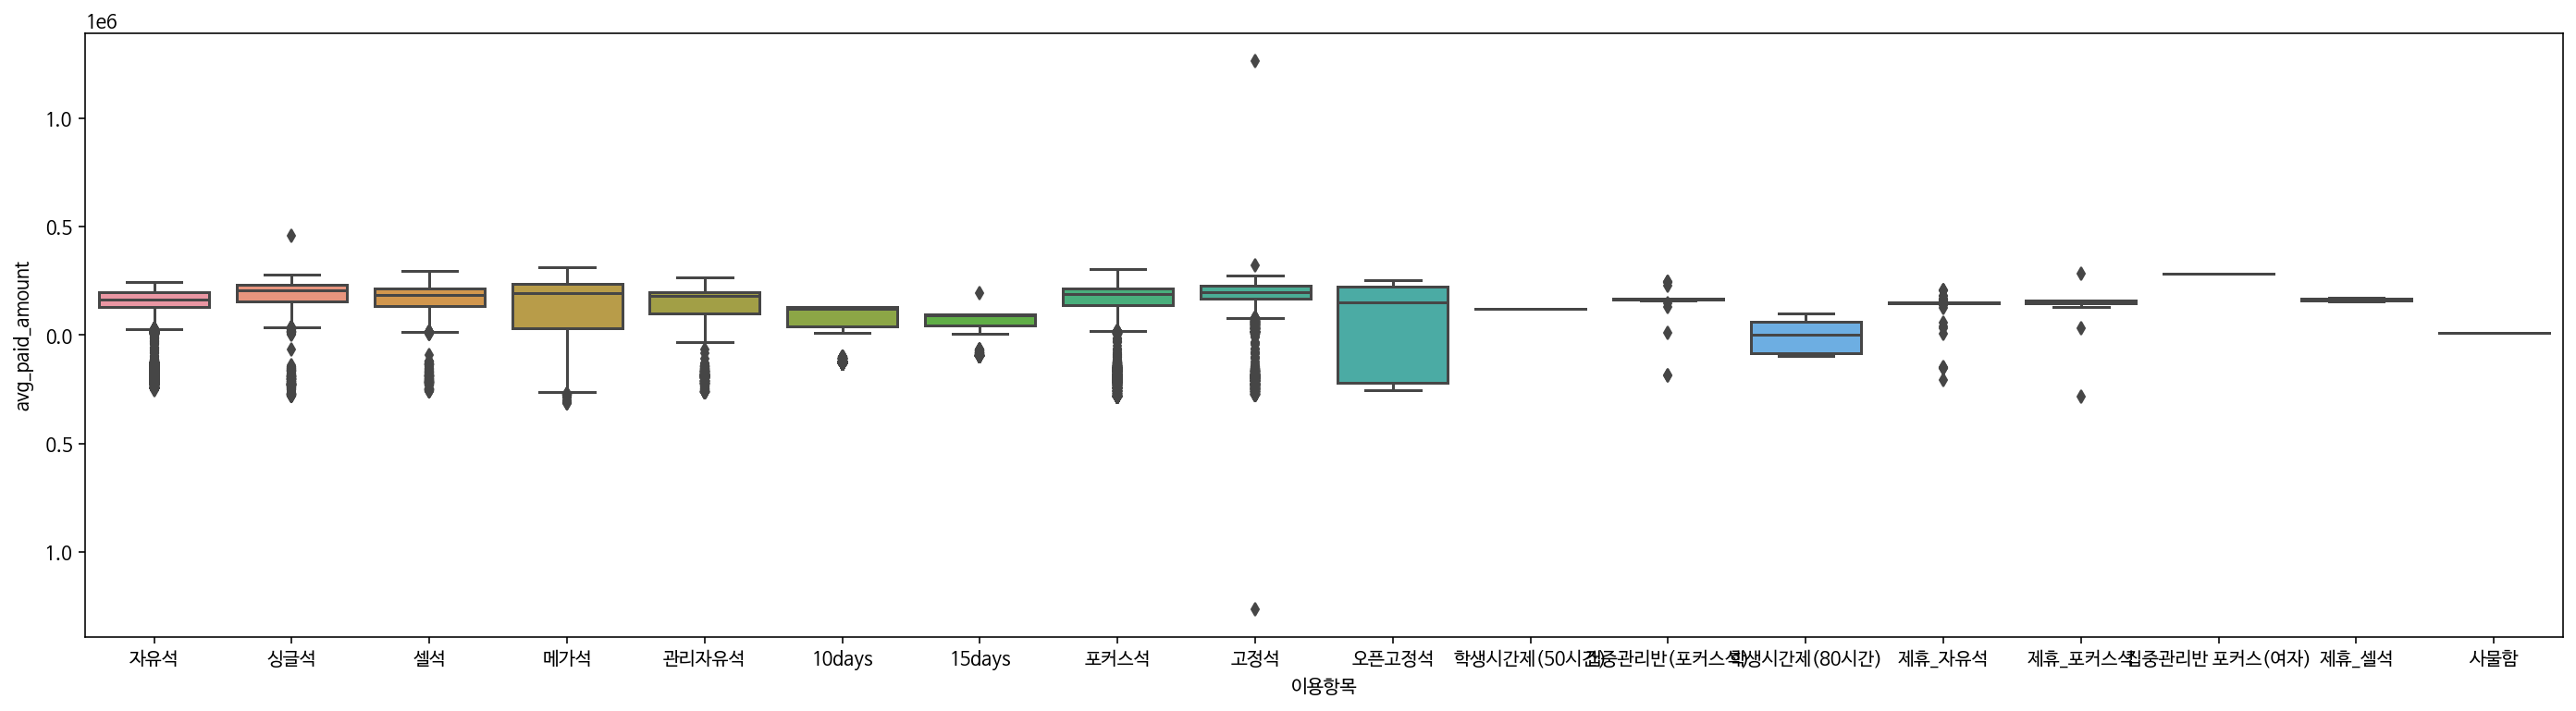

CPU times: user 1.11 s, sys: 14.1 ms, total: 1.13 s
Wall time: 1.43 s


In [ ]:
%%time
# 이용항목을 기준으로 평균 매출액 boxplot 그려보기

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.boxplot(
    data = df_base[df_base.avg_paid_amount.notnull()],
    x = '이용항목',
    y = 'avg_paid_amount'
)

plt.show()

In [ ]:
# Y축을 더 보기 좋게
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

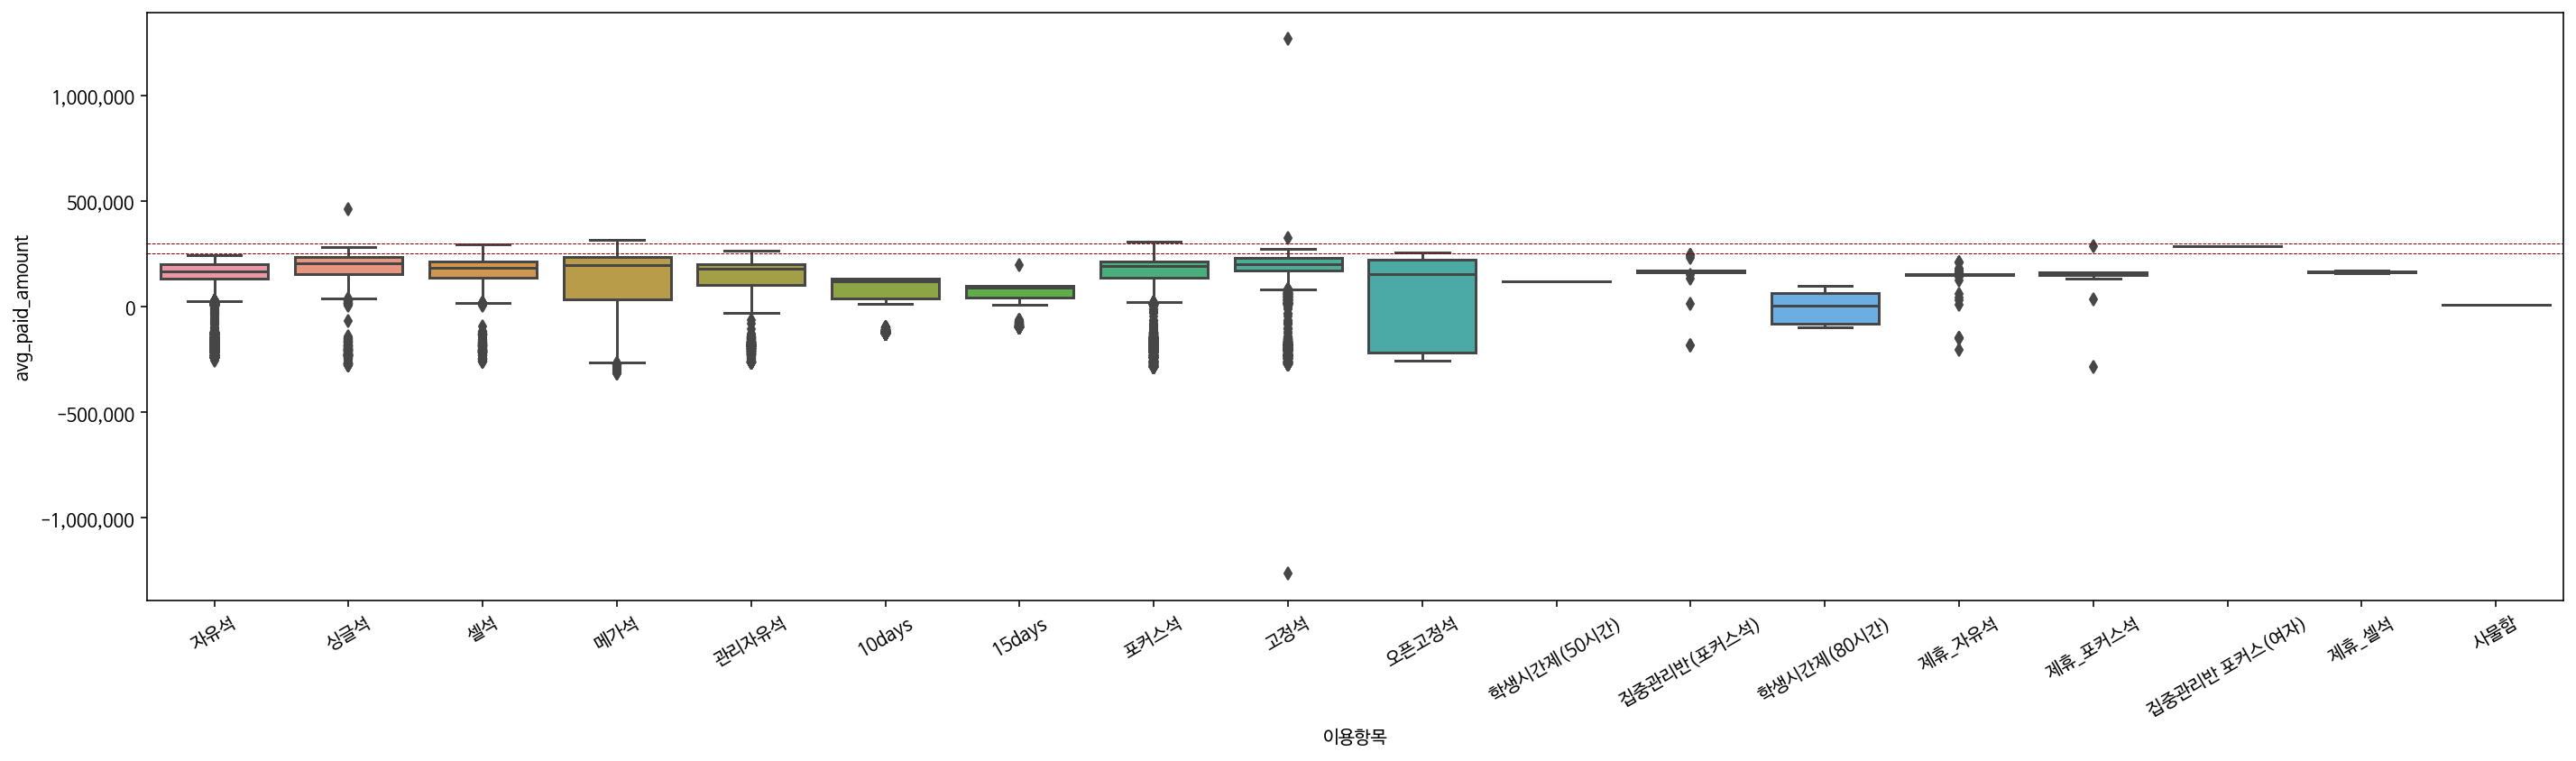

CPU times: user 1.02 s, sys: 123 ms, total: 1.14 s
Wall time: 1.05 s


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))
sns.boxplot(
    data = df_base[df_base.avg_paid_amount.notnull()],
    x = '이용항목',
    y = 'avg_paid_amount'
)

ax.get_yaxis().set_major_formatter(
ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.axhline(300_000, color = 'darkred', linewidth = 0.5, linestyle = '--')
plt.axhline(250_000, color = 'darkred', linewidth = 0.5, linestyle = '--')

plt.xticks(rotation = 30)
plt.show()

In [ ]:
# 월 평균 금액이 100만원 이상인 건 보기
df_base[df_base.avg_paid_amount > 1_000_000]

,회원키,매출키,지점,매출구분,이용항목,이용개월,결제수단,결제일,이용시작일,이용종료일,결제구분,할인금액,결제금액,avg_paid_amount
29468,7568,1047571,19호,매출,고정석,1,카드,2021-03-18,2021-02-27,2021-03-17,현장결제,0,1266400,1266400.0


In [ ]:
# 해당 회원의 모든 결제 내역
df_base[df_base['회원키'] == 7568].sort_values(by = '매출키', ascending = True)

,회원키,매출키,지점,매출구분,이용항목,이용개월,결제수단,결제일,이용시작일,이용종료일,결제구분,할인금액,결제금액,avg_paid_amount
29467,7568,1029237,19호,매출,고정석,1,카드,2021-02-26,2021-02-27,2021-03-29,키오스크결제,0,200000,200000.0
29468,7568,1047571,19호,매출,고정석,1,카드,2021-03-18,2021-02-27,2021-03-17,현장결제,0,1266400,1266400.0
29469,7568,1047572,19호,매출취소,고정석,1,카드,2021-03-18,2021-02-27,2021-03-29,키오스크결제,0,-200000,-200000.0
29470,7568,1047584,19호,매출,포커스석,6,카드,2021-03-18,2021-03-19,2021-09-14,현장결제,102000,918000,153000.0
29471,7568,1047592,19호,매출취소,포커스석,6,카드,2021-03-18,2021-03-19,2021-09-14,현장결제,-102000,-918000,-153000.0
29472,7568,1047596,19호,매출,포커스석,6,카드,2021-03-18,2021-03-18,2021-09-14,현장결제,102000,918000,153000.0
29473,7568,1047597,19호,매출,고정석,1,카드,2021-03-18,2021-02-27,2021-03-17,현장결제,0,126640,126640.0
29474,7568,1048233,19호,매출취소,고정석,1,카드,2021-03-19,2021-02-27,2021-03-17,현장결제,0,-1266400,-1266400.0
29475,7568,1149345,19호,매출,포커스석,6,카드,2021-07-08,2021-03-18,2021-07-08,온라인결제,0,612000,102000.0
29476,7568,1149347,19호,매출취소,포커스석,6,카드,2021-07-08,2021-03-18,2021-09-14,온라인결제,-102000,-918000,-153000.0


In [ ]:
# 해당 outlier 제거하기

df_base.drop(
    df_base[(df_base['avg_paid_amount'] > 1_000_000) | (df_base['avg_paid_amount'] < -1_000_000)].index,
    inplace = True
)

# 제거된 결과 확인
df_base[df_base['회원키'] == 7568].sort_values(by = '매출키', ascending = True)

,회원키,매출키,지점,매출구분,이용항목,이용개월,결제수단,결제일,이용시작일,이용종료일,결제구분,할인금액,결제금액,avg_paid_amount
29467,7568,1029237,19호,매출,고정석,1,카드,2021-02-26,2021-02-27,2021-03-29,키오스크결제,0,200000,200000.0
29469,7568,1047572,19호,매출취소,고정석,1,카드,2021-03-18,2021-02-27,2021-03-29,키오스크결제,0,-200000,-200000.0
29470,7568,1047584,19호,매출,포커스석,6,카드,2021-03-18,2021-03-19,2021-09-14,현장결제,102000,918000,153000.0
29471,7568,1047592,19호,매출취소,포커스석,6,카드,2021-03-18,2021-03-19,2021-09-14,현장결제,-102000,-918000,-153000.0
29472,7568,1047596,19호,매출,포커스석,6,카드,2021-03-18,2021-03-18,2021-09-14,현장결제,102000,918000,153000.0
29473,7568,1047597,19호,매출,고정석,1,카드,2021-03-18,2021-02-27,2021-03-17,현장결제,0,126640,126640.0
29475,7568,1149345,19호,매출,포커스석,6,카드,2021-07-08,2021-03-18,2021-07-08,온라인결제,0,612000,102000.0
29476,7568,1149347,19호,매출취소,포커스석,6,카드,2021-07-08,2021-03-18,2021-09-14,온라인결제,-102000,-918000,-153000.0


# 5. 분석하기 좋은 데이터로 만들기

## 5-1. 컬럼 이름 바꾸기

In [ ]:
df_base.rename(
    columns = {
        '회원키':'user_key',
        '매출키':'sales_key',
        '지점':'branch',
        '매출구분':'sales_type',
        '이용항목':'items',
        '이용개월':'term',
        '결제수단':'paid_by',
        '결제일':'paid_date',
        '이용시작일':'start_date',
        '이용종료일':'end_date',
        '결제구분':'payment_type',
        '할인금액':'discount',
        '결제금액':'paid_amount',
    },
    inplace = True
)

In [ ]:
# 바뀐 컬럼 이름의 DF 확인
df_base.head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0
1,2,1022868,01호,매출,사물함,0,카드,2021-02-18,2021-02-18,2021-02-18,온라인결제,0,22000,NaN
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0
3,2,1060775,01호,매출,사물함,0,카드,2021-04-03,2021-04-03,2021-04-03,온라인결제,0,45000,NaN
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0


## 5-2. data type: 날짜 데이터

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72443 entries, 0 to 72444
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_key         72443 non-null  int64  
 1   sales_key        72443 non-null  int64  
 2   branch           72443 non-null  object 
 3   sales_type       72443 non-null  object 
 4   items            72443 non-null  object 
 5   term             72443 non-null  int64  
 6   paid_by          72443 non-null  object 
 7   paid_date        72443 non-null  object 
 8   start_date       72443 non-null  object 
 9   end_date         72443 non-null  object 
 10  payment_type     72443 non-null  object 
 11  discount         72443 non-null  int64  
 12  paid_amount      72443 non-null  int64  
 13  avg_paid_amount  61455 non-null  float64
dtypes: float64(1), int64(5), object(8)
memory usage: 8.3+ MB


In [ ]:
# data type → 날짜 데이터로 변환
df_base['paid_date'] = pd.to_datetime(df_base['paid_date'], format = '%Y-%m-%d')
df_base['start_date'] = pd.to_datetime(df_base['start_date'], format = '%Y-%m-%d')
df_base['end_date'] = pd.to_datetime(df_base['end_date'], format = '%Y-%m-%d')
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72443 entries, 0 to 72444
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_key         72443 non-null  int64         
 1   sales_key        72443 non-null  int64         
 2   branch           72443 non-null  object        
 3   sales_type       72443 non-null  object        
 4   items            72443 non-null  object        
 5   term             72443 non-null  int64         
 6   paid_by          72443 non-null  object        
 7   paid_date        72443 non-null  datetime64[ns]
 8   start_date       72443 non-null  datetime64[ns]
 9   end_date         72443 non-null  datetime64[ns]
 10  payment_type     72443 non-null  object        
 11  discount         72443 non-null  int64         
 12  paid_amount      72443 non-null  int64         
 13  avg_paid_amount  61455 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int6

In [ ]:
# date관련 데이터 추가하기: 월 정보, 요일 정보

df_base['paid_month'] = df_base['paid_date'].dt.month
df_base['start_month'] = df_base['start_date'].dt.month
df_base['end_month'] = df_base['end_date'].dt.month
df_base['start_day'] = df_base['start_date'].dt.day_name()

df_base.head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount,paid_month,start_month,end_month,start_day
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0,4,4,5,Sunday
1,2,1022868,01호,매출,사물함,0,카드,2021-02-18,2021-02-18,2021-02-18,온라인결제,0,22000,NaN,2,2,2,Thursday
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0,3,4,7,Saturday
3,2,1060775,01호,매출,사물함,0,카드,2021-04-03,2021-04-03,2021-04-03,온라인결제,0,45000,NaN,4,4,4,Saturday
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0,6,7,8,Saturday


## 5-3. 시계열 데이터 → 다음 매출과의 연속성 분석을 위한 전처리

In [ ]:
df_base.sort_values(by = ['branch', 'user_key', 'sales_key'], ascending = True).head(10)

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount,paid_month,start_month,end_month,start_day
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0,4,4,5,Sunday
1,2,1022868,01호,매출,사물함,0,카드,2021-02-18,2021-02-18,2021-02-18,온라인결제,0,22000,NaN,2,2,2,Thursday
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0,3,4,7,Saturday
3,2,1060775,01호,매출,사물함,0,카드,2021-04-03,2021-04-03,2021-04-03,온라인결제,0,45000,NaN,4,4,4,Saturday
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0,6,7,8,Saturday
5,2,1139488,01호,매출,사물함,0,카드,2021-06-30,2021-06-30,2021-06-30,온라인결제,0,1500,NaN,6,6,6,Wednesday
6,2,1210305,01호,매출,싱글석,1,카드,2021-08-31,2021-09-01,2021-09-30,온라인결제,0,240000,240000.0,8,9,9,Wednesday
7,2,1239778,01호,매출,싱글석,1,카드,2021-09-30,2021-10-01,2021-10-30,온라인결제,0,240000,240000.0,9,10,10,Friday
8,2,1252068,01호,매출,사물함,0,카드,2021-10-13,2021-10-13,2021-10-13,온라인결제,0,9000,NaN,10,10,10,Wednesday
9,3,1126771,01호,매출,셀석,2,카드,2021-06-18,2021-06-19,2021-08-18,온라인결제,0,440000,220000.0,6,6,8,Saturday


In [ ]:
df_base['items'].unique()

array(['자유석', '사물함', '싱글석', '셀석', '1day', '메가석', '관리자유석', '10days',
       '15days', '포커스석', '고정석', '오픈고정석', '학생시간제(50시간)', '집중관리반(포커스석)',
       '학생시간제(80시간)', '제휴_자유석', '제휴_포커스석', '집중관리반 포커스(여자)', '제휴_셀석'],
      dtype=object)

In [ ]:
len(df_base)

72443

In [ ]:
# 사물함 제외( 좌석 이용의 부차적인 요소이므로 )
df_seat = df_base[df_base['items'] != '사물함']
df_seat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71293 entries, 0 to 72444
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_key         71293 non-null  int64         
 1   sales_key        71293 non-null  int64         
 2   branch           71293 non-null  object        
 3   sales_type       71293 non-null  object        
 4   items            71293 non-null  object        
 5   term             71293 non-null  int64         
 6   paid_by          71293 non-null  object        
 7   paid_date        71293 non-null  datetime64[ns]
 8   start_date       71293 non-null  datetime64[ns]
 9   end_date         71293 non-null  datetime64[ns]
 10  payment_type     71293 non-null  object        
 11  discount         71293 non-null  int64         
 12  paid_amount      71293 non-null  int64         
 13  avg_paid_amount  61454 non-null  float64       
 14  paid_month       71293 non-null  int64

In [ ]:
df_seat.sort_values(by = ['branch', 'user_key', 'sales_key'], ascending = True).head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount,paid_month,start_month,end_month,start_day
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0,4,4,5,Sunday
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0,3,4,7,Saturday
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0,6,7,8,Saturday
6,2,1210305,01호,매출,싱글석,1,카드,2021-08-31,2021-09-01,2021-09-30,온라인결제,0,240000,240000.0,8,9,9,Wednesday
7,2,1239778,01호,매출,싱글석,1,카드,2021-09-30,2021-10-01,2021-10-30,온라인결제,0,240000,240000.0,9,10,10,Friday


In [ ]:
df_seat['next_start_date'] = df_seat['start_date'].shift(-1).fillna(0)
df_seat[['user_key', 'sales_key', 'start_date', 'end_date', 'next_start_date']].head()

,user_key,sales_key,start_date,end_date,next_start_date
0,1,1067235,2021-04-11,2021-05-10,2021-04-03 00:00:00
2,2,1055317,2021-04-03,2021-07-02,2021-07-03 00:00:00
4,2,1136132,2021-07-03,2021-08-31,2021-09-01 00:00:00
6,2,1210305,2021-09-01,2021-09-30,2021-10-01 00:00:00
7,2,1239778,2021-10-01,2021-10-30,2021-06-19 00:00:00


In [ ]:
df_seat['user_lead_1'] = df_seat['user_key'].shift(-1)
df_seat['user_lead_1'].fillna(0, inplace = True)
df_seat['user_lead_1'] = df_seat['user_lead_1'].astype(int)
df_seat['user_check'] = df_seat['user_key'] - df_seat['user_lead_1']
df_seat[['user_key', 'sales_key', 'start_date', 'end_date', 'next_start_date', 'user_lead_1', 'user_check']].head()

,user_key,sales_key,start_date,end_date,next_start_date,user_lead_1,user_check
0,1,1067235,2021-04-11,2021-05-10,2021-04-03 00:00:00,2,-1
2,2,1055317,2021-04-03,2021-07-02,2021-07-03 00:00:00,2,0
4,2,1136132,2021-07-03,2021-08-31,2021-09-01 00:00:00,2,0
6,2,1210305,2021-09-01,2021-09-30,2021-10-01 00:00:00,2,0
7,2,1239778,2021-10-01,2021-10-30,2021-06-19 00:00:00,3,-1


In [ ]:
def get_day_diff(user_check, from_dt, to_dt):
    if user_check == 0:
        return (to_dt - from_dt).days -1
    else:
        return None

In [ ]:
df_seat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71293 entries, 0 to 72444
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_key         71293 non-null  int64         
 1   sales_key        71293 non-null  int64         
 2   branch           71293 non-null  object        
 3   sales_type       71293 non-null  object        
 4   items            71293 non-null  object        
 5   term             71293 non-null  int64         
 6   paid_by          71293 non-null  object        
 7   paid_date        71293 non-null  datetime64[ns]
 8   start_date       71293 non-null  datetime64[ns]
 9   end_date         71293 non-null  datetime64[ns]
 10  payment_type     71293 non-null  object        
 11  discount         71293 non-null  int64         
 12  paid_amount      71293 non-null  int64         
 13  avg_paid_amount  61454 non-null  float64       
 14  paid_month       71293 non-null  int64

In [ ]:
%%time
df_seat['elapsed_days'] = df_seat.apply(lambda s: get_day_diff(s.user_check, s.end_date, s.next_start_date), axis = 1)

CPU times: user 3.91 s, sys: 53.2 ms, total: 3.97 s
Wall time: 3.99 s


In [ ]:
df_seat[['user_key', 'start_date', 'end_date', 'next_start_date', 'elapsed_days']]

,user_key,start_date,end_date,next_start_date,elapsed_days
0,1,2021-04-11,2021-05-10,2021-04-03 00:00:00,NaN
2,2,2021-04-03,2021-07-02,2021-07-03 00:00:00,0.0
4,2,2021-07-03,2021-08-31,2021-09-01 00:00:00,0.0
6,2,2021-09-01,2021-09-30,2021-10-01 00:00:00,0.0
7,2,2021-10-01,2021-10-30,2021-06-19 00:00:00,NaN
...,...,...,...,...,...
72440,18947,2021-12-17,2022-01-15,2021-01-16 00:00:00,NaN
72441,18948,2021-01-16,2021-02-19,2021-02-20 00:00:00,0.0
72442,18948,2021-02-20,2021-03-21,2021-09-04 00:00:00,166.0
72443,18948,2021-09-04,2021-10-03,2021-03-10 00:00:00,NaN


In [ ]:
df_base.head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount,paid_month,start_month,end_month,start_day
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0,4,4,5,Sunday
1,2,1022868,01호,매출,사물함,0,카드,2021-02-18,2021-02-18,2021-02-18,온라인결제,0,22000,NaN,2,2,2,Thursday
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0,3,4,7,Saturday
3,2,1060775,01호,매출,사물함,0,카드,2021-04-03,2021-04-03,2021-04-03,온라인결제,0,45000,NaN,4,4,4,Saturday
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0,6,7,8,Saturday


# 6. EDA

## 6-1. Seasonality 확인: seasonality마다 운영에 주력해야 할 포인트 찾아보기

In [ ]:
# payment_type을 기준으로 매출 건수, 회원 수, 매출금액의 seasonality 확인( 온라인 결제 // 키오스크 결제 // 현장 결제 )
df_season = df_base.groupby(['payment_type', 'start_month']).agg(user_cnts=('user_key', 'nunique'), sales_cnts=('sales_key', 'nunique'), paid_amount=('paid_amount', 'sum')).reset_index()
df_season

,payment_type,start_month,user_cnts,sales_cnts,paid_amount
0,온라인결제,1,1478,2042,261735180
1,온라인결제,2,1379,1954,250929980
2,온라인결제,3,1550,2316,303436650
3,온라인결제,4,1323,1937,241303150
4,온라인결제,5,1339,2044,226558840
...,...,...,...,...,...
31,현장결제,8,431,691,29838390
32,현장결제,9,434,625,33669493
33,현장결제,10,766,1051,72425997
34,현장결제,11,1217,1528,68634666


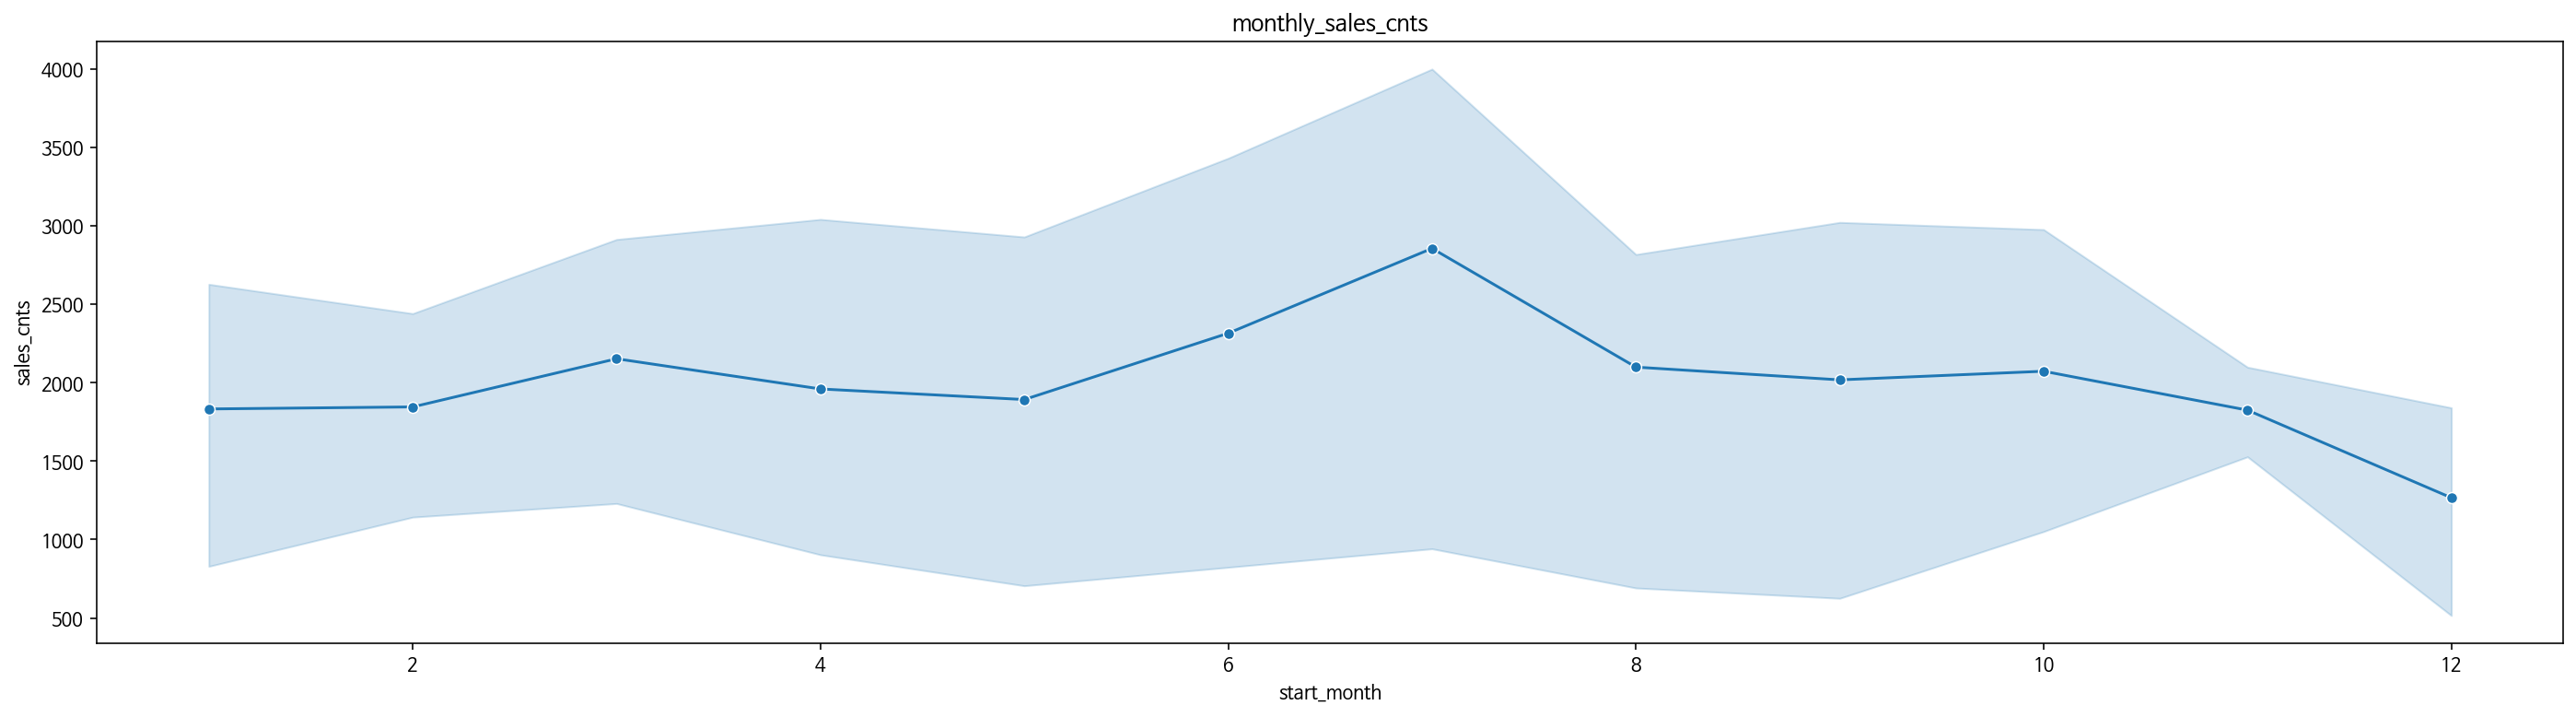

CPU times: user 802 ms, sys: 12.3 ms, total: 815 ms
Wall time: 818 ms


In [ ]:
%%time
# payment_type 구분 없이, 매출 건 수 변화

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_season,
    x = 'start_month',
    y = 'sales_cnts',
    marker = 'o'
)
plt.title(f'monthly_sales_cnts')
plt.show()

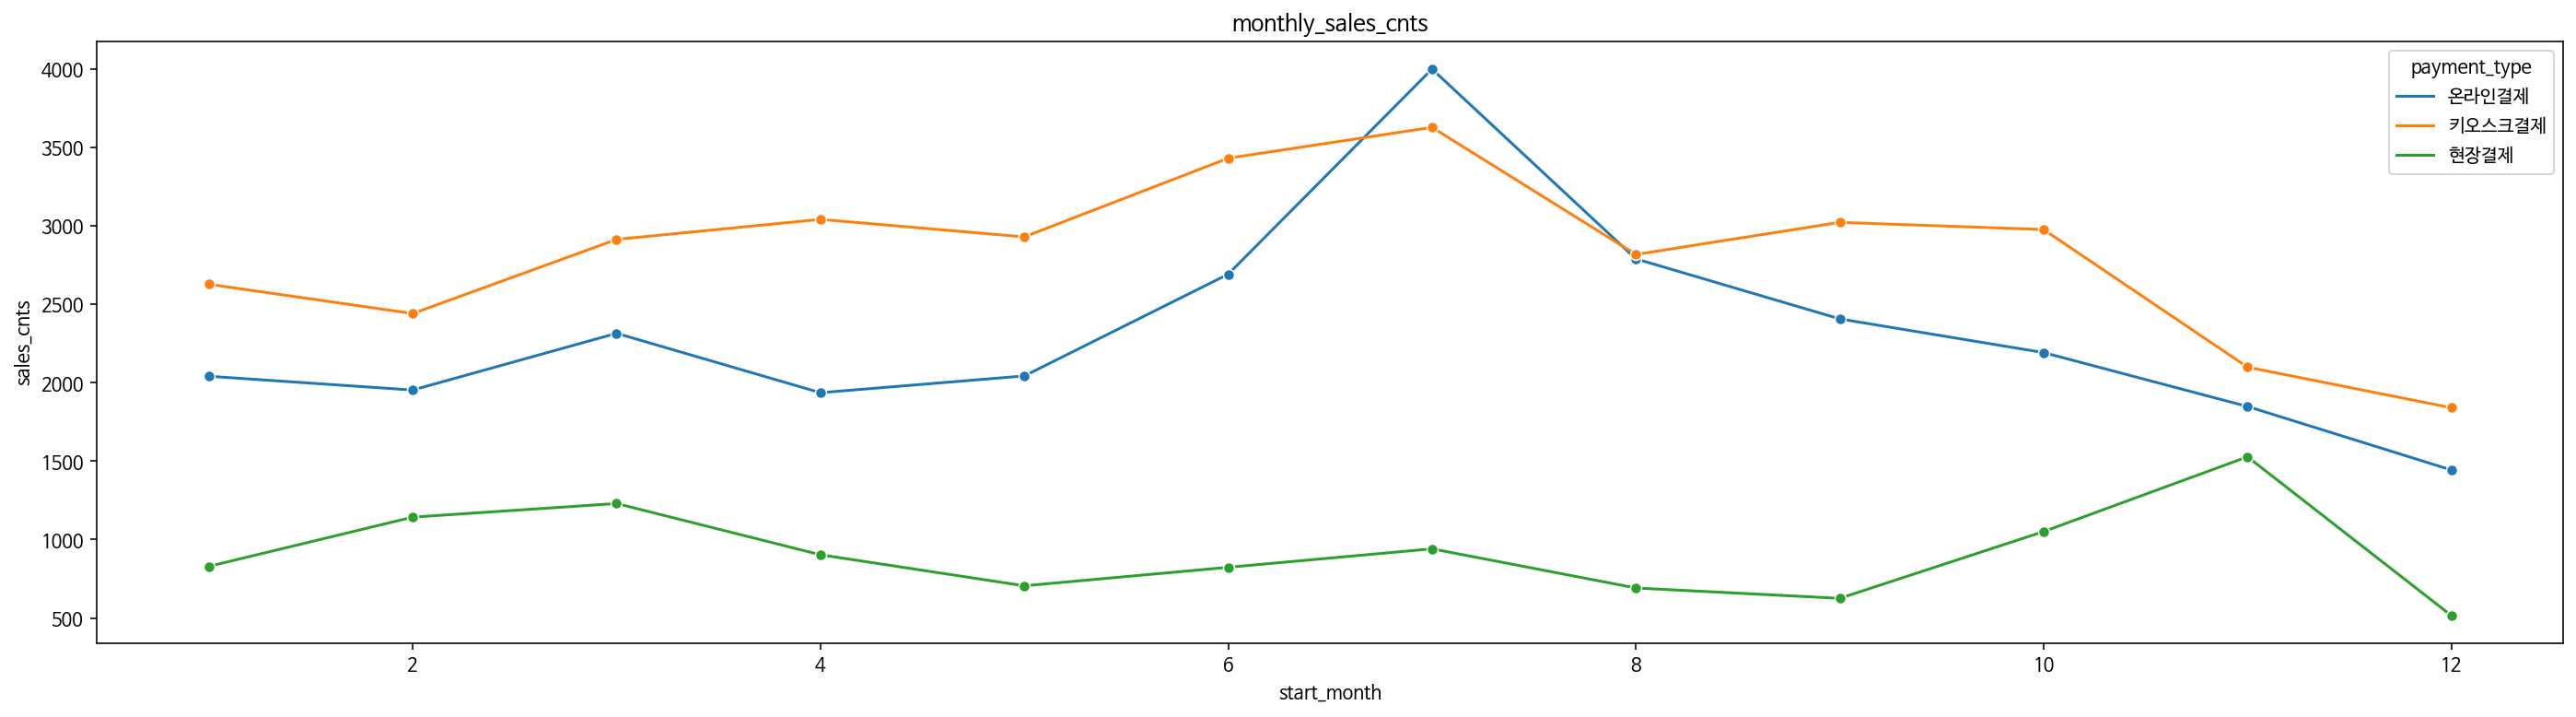

CPU times: user 590 ms, sys: 8.8 ms, total: 598 ms
Wall time: 601 ms


In [ ]:
%%time
# payment_type 구분하여, 매출 건 수 변화

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_season,
    x = 'start_month',
    y = 'sales_cnts',
    marker = 'o',
    hue = 'payment_type'
)
plt.title(f'monthly_sales_cnts')
plt.show()

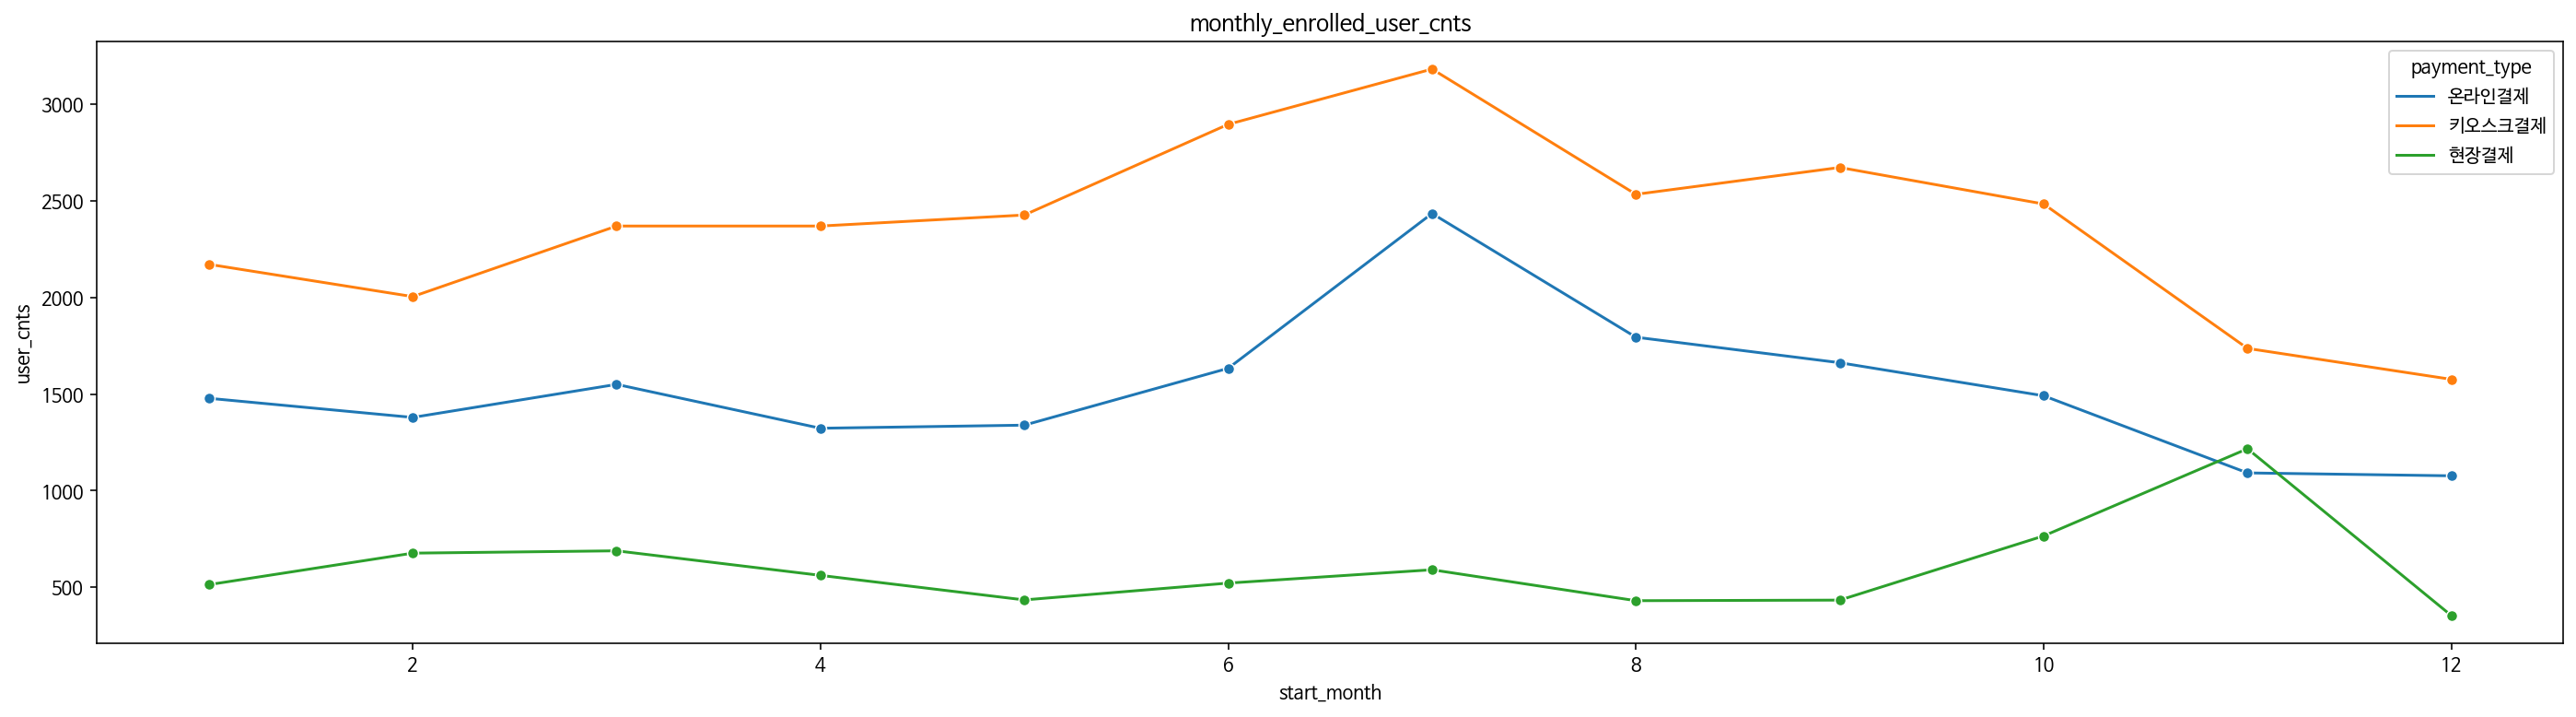

CPU times: user 584 ms, sys: 17.3 ms, total: 601 ms
Wall time: 606 ms


In [ ]:
%%time
# payment_type 마다, 등록 회원 수 변화

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_season,
    x = 'start_month',
    y = 'user_cnts',
    marker = 'o',
    hue = 'payment_type'
)
plt.title(f'monthly_enrolled_user_cnts')
plt.show()

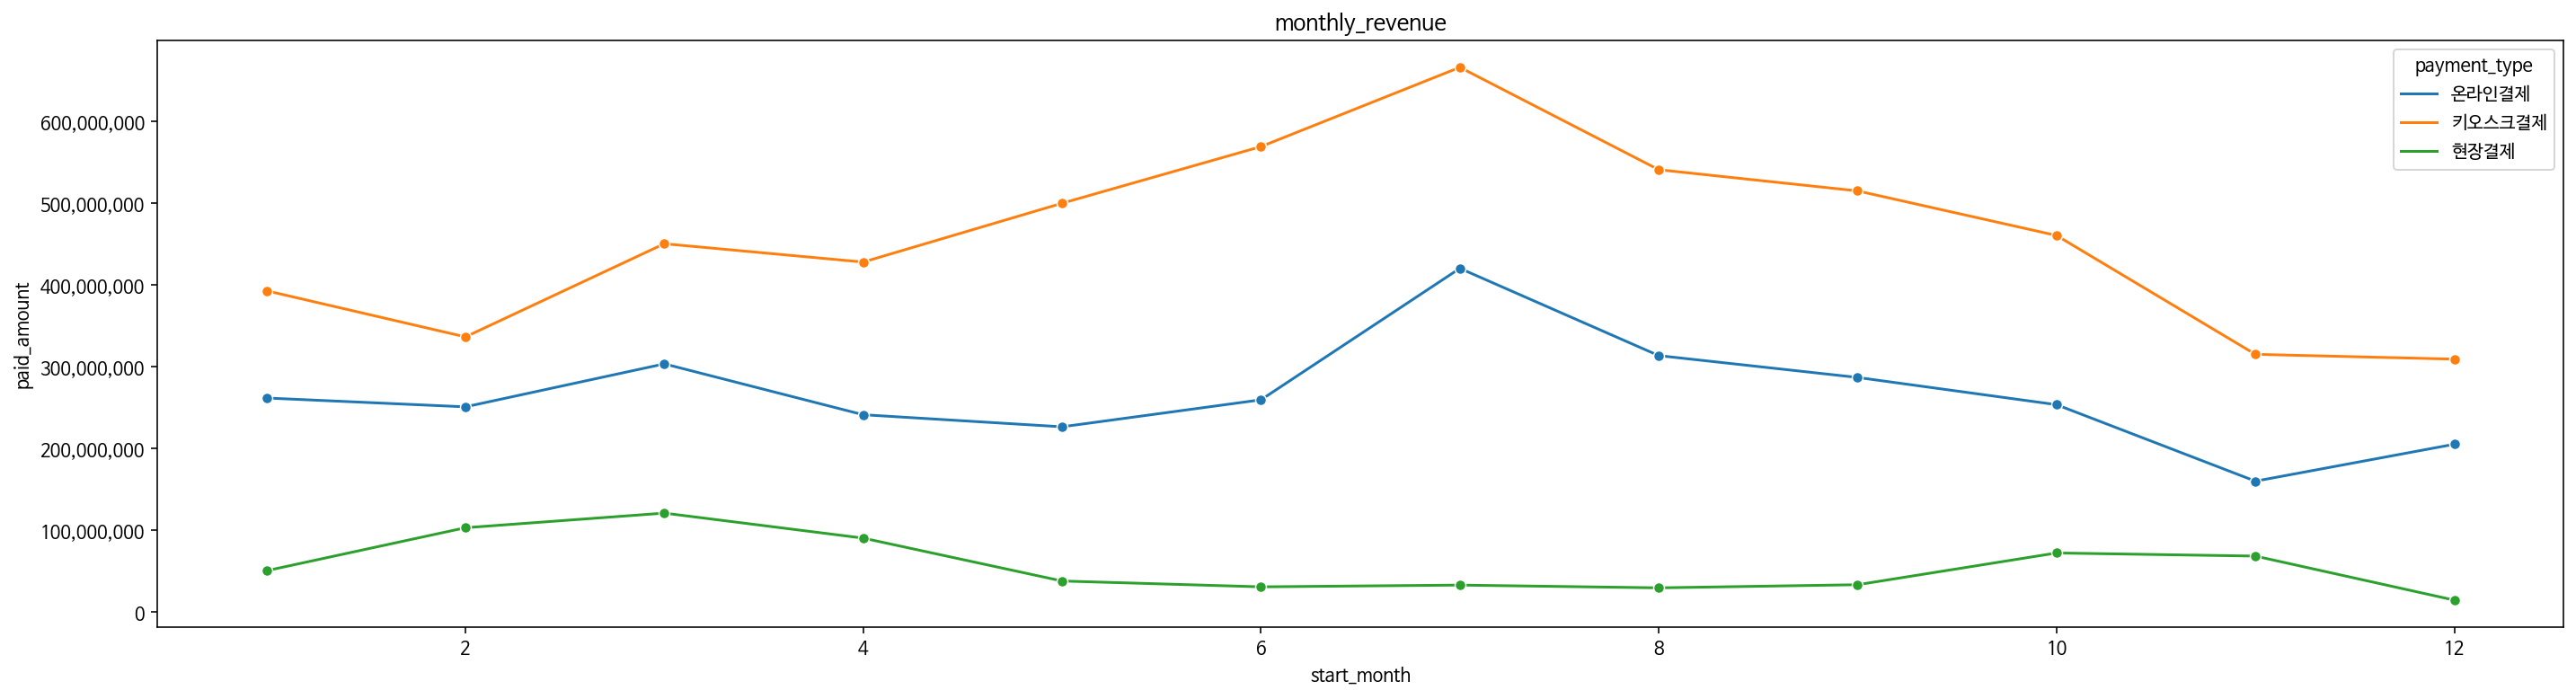

CPU times: user 530 ms, sys: 13 ms, total: 543 ms
Wall time: 545 ms


In [ ]:
%%time
# payment_type 마다, 매출액 변화

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_season,
    x = 'start_month',
    y = 'paid_amount',
    marker = 'o',
    hue = 'payment_type'
)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title(f'monthly_revenue')
plt.show()


### y축 서식: ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [ ]:
df_season

,payment_type,start_month,user_cnts,sales_cnts,paid_amount
0,온라인결제,1,1478,2042,261735180
1,온라인결제,2,1379,1954,250929980
2,온라인결제,3,1550,2316,303436650
3,온라인결제,4,1323,1937,241303150
4,온라인결제,5,1339,2044,226558840
...,...,...,...,...,...
31,현장결제,8,431,691,29838390
32,현장결제,9,434,625,33669493
33,현장결제,10,766,1051,72425997
34,현장결제,11,1217,1528,68634666


In [ ]:
df_peak_check = df_season.groupby(['start_month'])['user_cnts', 'sales_cnts', 'paid_amount'].agg('sum').reset_index()

df_peak_check['user_ratio'] = df_peak_check['user_cnts']*100 / df_peak_check['user_cnts'].mean()
df_peak_check['sales_ratio'] = df_peak_check['sales_cnts']*100 / df_peak_check['sales_cnts'].mean()
df_peak_check['revenue_ratio'] = df_peak_check['paid_amount']*100 / df_peak_check['paid_amount'].mean()

df_peak_check['user_ratio_v1'] = df_peak_check['user_cnts']*100 / df_peak_check[df_peak_check['start_month'] == 1]['user_cnts'][0]
df_peak_check['sales_ratio_v1'] = df_peak_check['sales_cnts']*100 / df_peak_check[df_peak_check['start_month'] == 1]['sales_cnts'][0]
df_peak_check['revenue_ratio_v1'] = df_peak_check['paid_amount']*100 / df_peak_check[df_peak_check['start_month'] == 1]['paid_amount'][0]

df_peak_check


,start_month,user_cnts,sales_cnts,paid_amount,user_ratio,sales_ratio,revenue_ratio,user_ratio_v1,sales_ratio_v1,revenue_ratio_v1
0,1,4163,5500,705245609,92.753300,91.107369,90.495590,100.000000,100.000000,100.000000
1,2,4060,5539,690591469,90.458419,91.753403,88.615202,97.525823,100.709091,97.922122
2,3,4608,6461,874755351,102.668078,107.026311,112.246713,110.689407,117.472727,124.035561
3,4,4254,5883,759676690,94.780817,97.451755,97.480068,102.185924,106.963636,107.718032
4,5,4200,5680,764408625,93.577675,94.089064,98.087260,100.888782,103.272727,108.388995
5,6,5050,6949,859434209,112.516014,115.110019,110.280737,121.306750,126.345455,121.863107
6,7,6206,8573,1119000268,138.272155,142.011540,143.587692,149.075186,155.872727,158.668165
7,8,4758,6301,883966390,106.010138,104.375915,113.428653,114.292577,114.563636,125.341637
8,9,4768,6057,835213393,106.232942,100.334060,107.172774,114.532789,110.127273,118.428726
9,10,4740,6222,786288887,105.609090,103.067281,100.894888,113.860197,113.127273,111.491497


In [ ]:
# 운영에 중점을 두어야 할 것들을 찾는 것이 목적이라면
# 시기에 따른 매출보다는 시기에 따른 좌석 이용 회원 수, 회원 특징(학년, 연령 등), 좌석 이용 형태를 들여다 보는 것이 더 정확하고 다양한 인사이트를 얻을 수 있다.

## 6-2. 매출 item trend 특징 살펴보기: seasonality의 연장선 → 세일즈에 집중해야 할 포인트 찾아보기

In [ ]:
df_seat.head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount,paid_month,start_month,end_month,start_day,next_start_date,user_lead_1,user_check,elapsed_days
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0,4,4,5,Sunday,2021-04-03 00:00:00,2,-1,NaN
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0,3,4,7,Saturday,2021-07-03 00:00:00,2,0,0.0
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0,6,7,8,Saturday,2021-09-01 00:00:00,2,0,0.0
6,2,1210305,01호,매출,싱글석,1,카드,2021-08-31,2021-09-01,2021-09-30,온라인결제,0,240000,240000.0,8,9,9,Wednesday,2021-10-01 00:00:00,2,0,0.0
7,2,1239778,01호,매출,싱글석,1,카드,2021-09-30,2021-10-01,2021-10-30,온라인결제,0,240000,240000.0,9,10,10,Friday,2021-06-19 00:00:00,3,-1,NaN


In [ ]:
df_seat['items'].unique()

array(['자유석', '싱글석', '셀석', '1day', '메가석', '관리자유석', '10days', '15days',
       '포커스석', '고정석', '오픈고정석', '학생시간제(50시간)', '집중관리반(포커스석)',
       '학생시간제(80시간)', '제휴_자유석', '제휴_포커스석', '집중관리반 포커스(여자)', '제휴_셀석'],
      dtype=object)

In [ ]:
# %day% = days
# %고정% | %싱글% = 고정석
# else = 자유석

In [ ]:
def get_item_seg(item_name):
    if item_name.find('day') != -1:
        return '단기'
    elif item_name.find('고정') != -1:
        return '고정'
    elif item_name.find('싱글') != -1:
        return '고정'
    else:
        return '자유'

In [ ]:
%%time
df_seat['item_seg'] = df_seat['items'].apply(lambda s: get_item_seg(s))

CPU times: user 61.4 ms, sys: 632 µs, total: 62 ms
Wall time: 66.4 ms


In [ ]:
df_seat.head()

,user_key,sales_key,branch,sales_type,items,term,paid_by,paid_date,start_date,end_date,payment_type,discount,paid_amount,avg_paid_amount,paid_month,start_month,end_month,start_day,next_start_date,user_lead_1,user_check,elapsed_days,item_seg
0,1,1067235,01호,매출,자유석,1,카드,2021-04-11,2021-04-11,2021-05-10,온라인결제,0,170000,170000.0,4,4,5,Sunday,2021-04-03 00:00:00,2,-1,NaN,자유
2,2,1055317,01호,매출,싱글석,3,카드,2021-03-28,2021-04-03,2021-07-02,키오스크결제,33000,627000,209000.0,3,4,7,Saturday,2021-07-03 00:00:00,2,0,0.0,고정
4,2,1136132,01호,매출,싱글석,2,카드,2021-06-27,2021-07-03,2021-08-31,키오스크결제,0,480000,240000.0,6,7,8,Saturday,2021-09-01 00:00:00,2,0,0.0,고정
6,2,1210305,01호,매출,싱글석,1,카드,2021-08-31,2021-09-01,2021-09-30,온라인결제,0,240000,240000.0,8,9,9,Wednesday,2021-10-01 00:00:00,2,0,0.0,고정
7,2,1239778,01호,매출,싱글석,1,카드,2021-09-30,2021-10-01,2021-10-30,온라인결제,0,240000,240000.0,9,10,10,Friday,2021-06-19 00:00:00,3,-1,NaN,고정


In [ ]:
# df_seat를 item_seg를 기준으로 groupby → df_item_seg
df_item_seg = df_seat.groupby(['item_seg', 'start_month']).agg(sales_cnts=('sales_key', 'nunique')).reset_index()
df_item_seg

,item_seg,start_month,sales_cnts
0,고정,1,1250
1,고정,2,1086
2,고정,3,1241
3,고정,4,1055
4,고정,5,1107
...,...,...,...
31,자유,8,4312
32,자유,9,3783
33,자유,10,3746
34,자유,11,3079


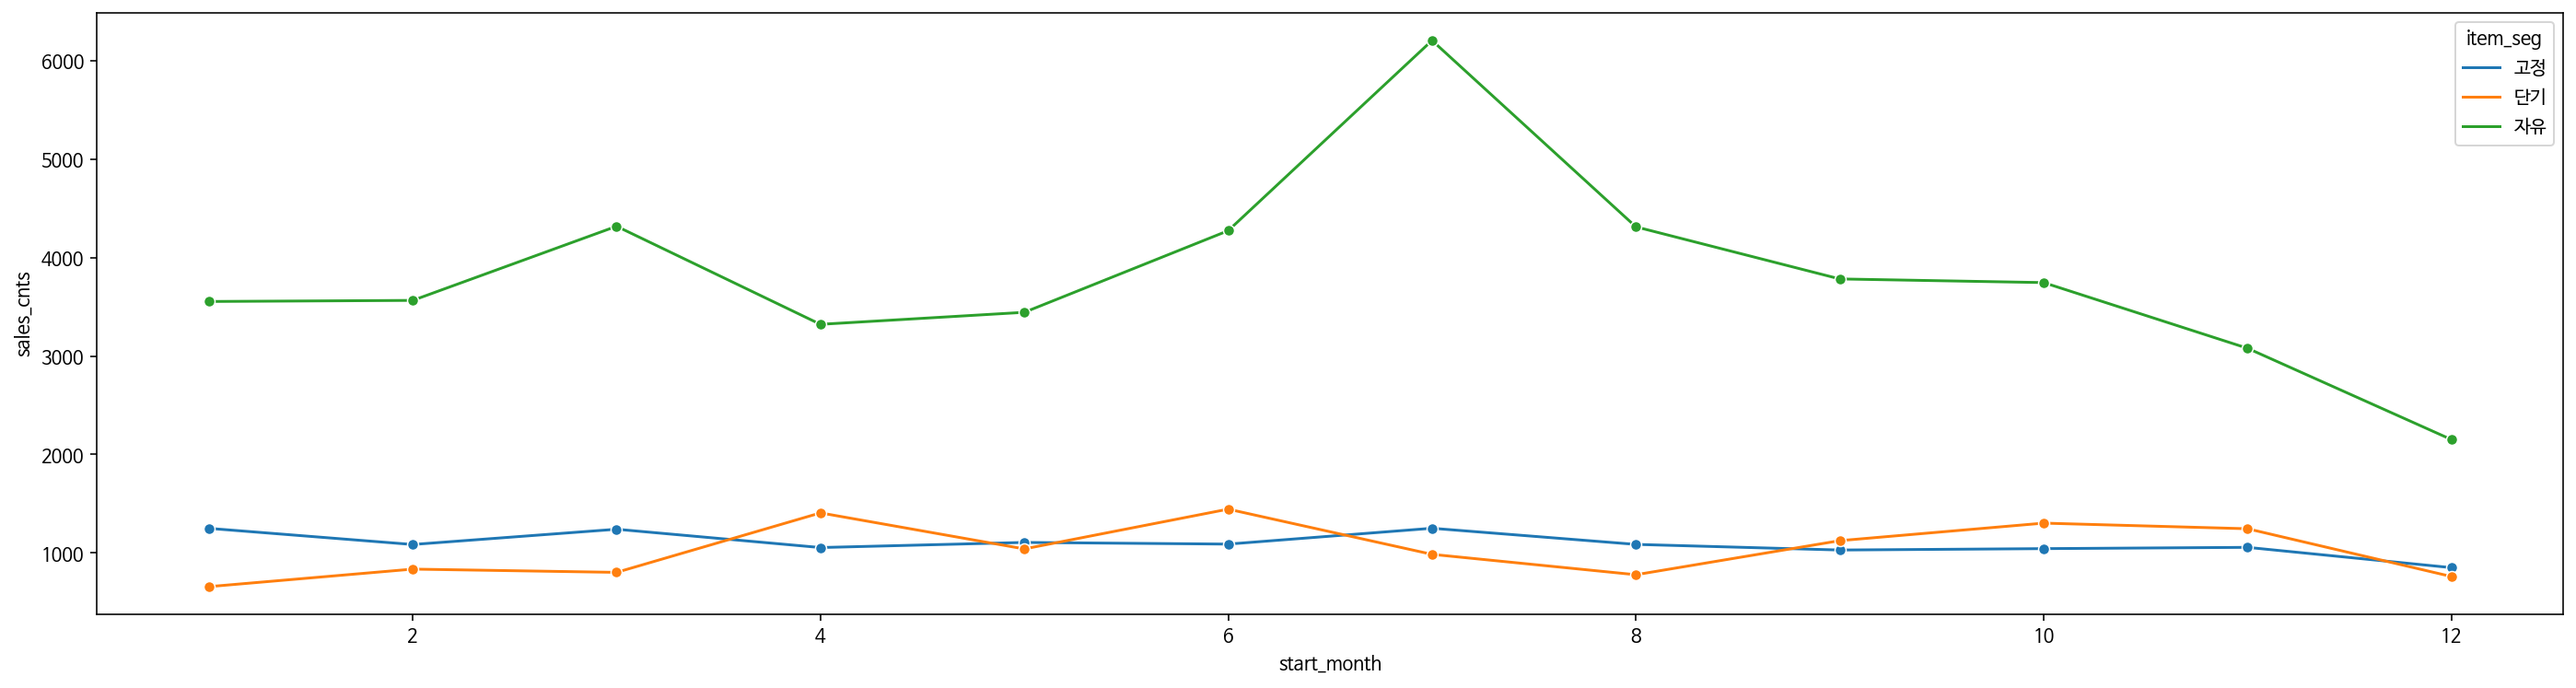

CPU times: user 489 ms, sys: 5.18 ms, total: 494 ms
Wall time: 498 ms


In [ ]:
%%time
# item_seg 마다, 매출 건 수 변화

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.lineplot(
    data = df_item_seg,
    x = 'start_month',
    y = 'sales_cnts',
    hue = 'item_seg',
    marker = 'o'
)

plt.show()

## 6-3. 재등록 소요일 알아보기: 한 번에 N개월을 등록할 경우 제공할 수 있는 Benefit 형태/규모의 상한선 감 잡기

In [ ]:
print(len(df_seat[df_seat.elapsed_days == 0]))
print(len(df_seat[df_seat.elapsed_days >  0]))
print(len(df_seat[df_seat.elapsed_days <  0]))

23892
10999
17454


In [ ]:
df_elapsed = df_seat[df_seat.elapsed_days >= 0]

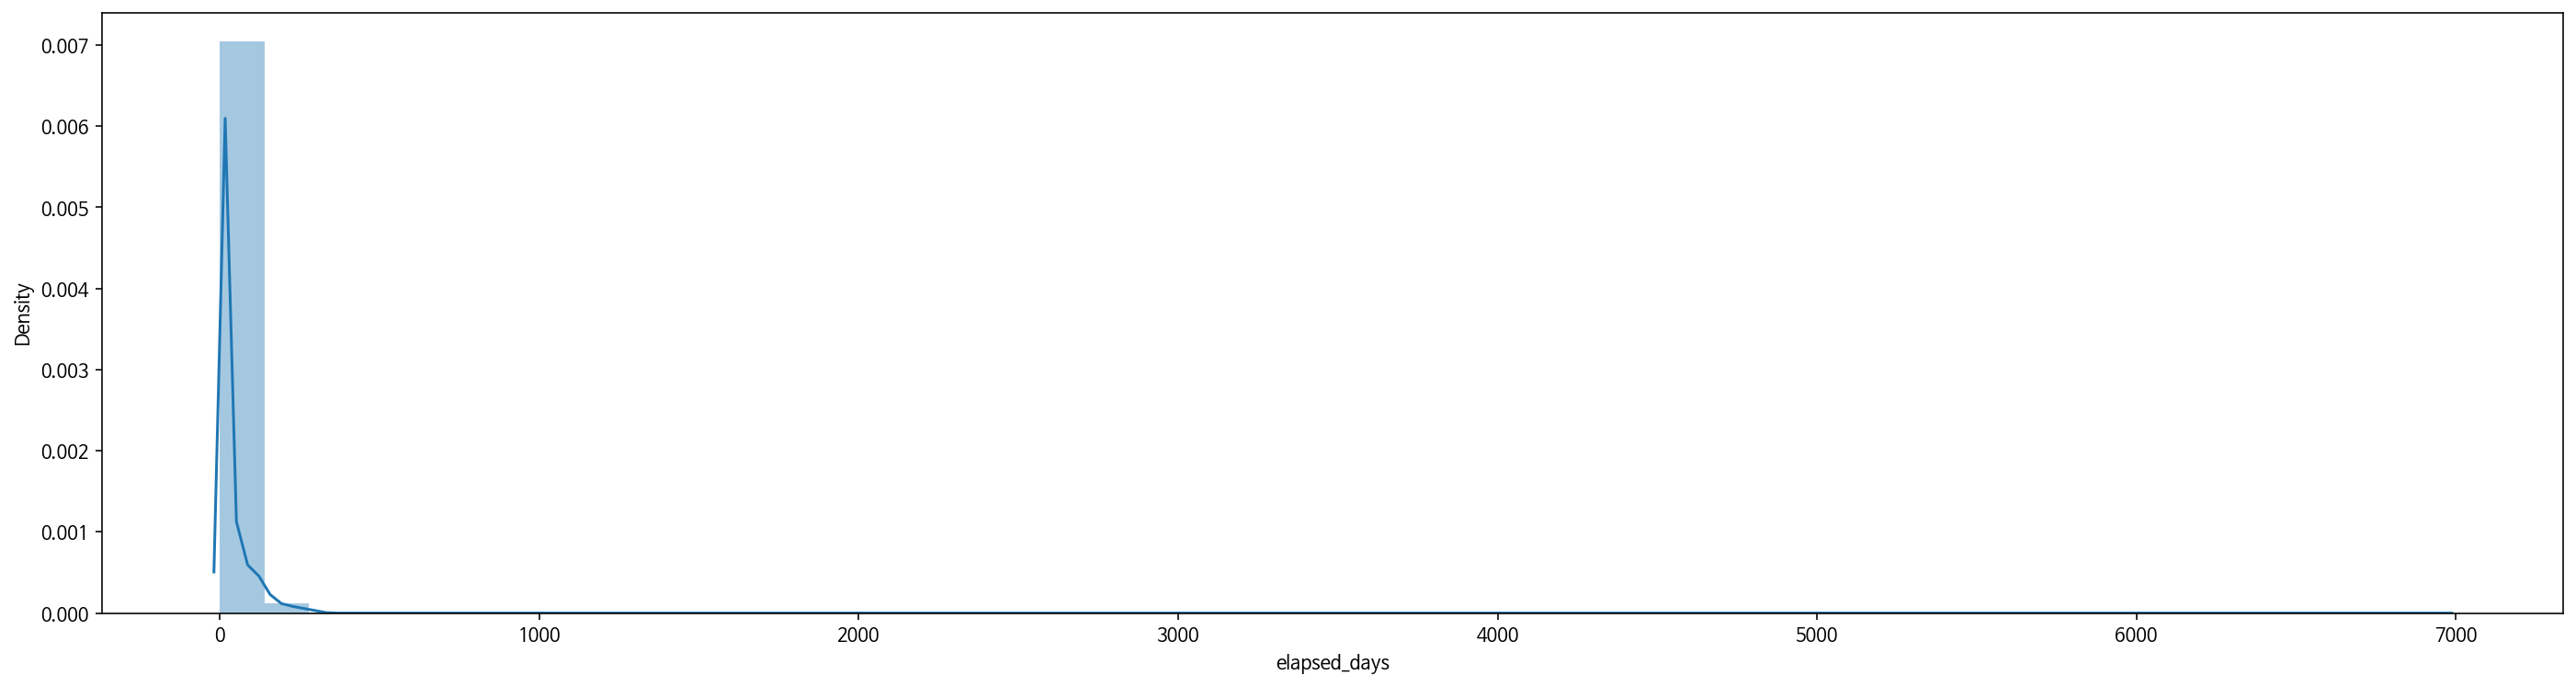

CPU times: user 706 ms, sys: 145 ms, total: 850 ms
Wall time: 736 ms


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_elapsed.elapsed_days)

plt.show()

In [ ]:
df_elapsed_a = df_elapsed[df_elapsed.elapsed_days <= 30]
df_elapsed_b = df_elapsed[(df_elapsed.elapsed_days > 30) & (df_elapsed.elapsed_days < 100)]

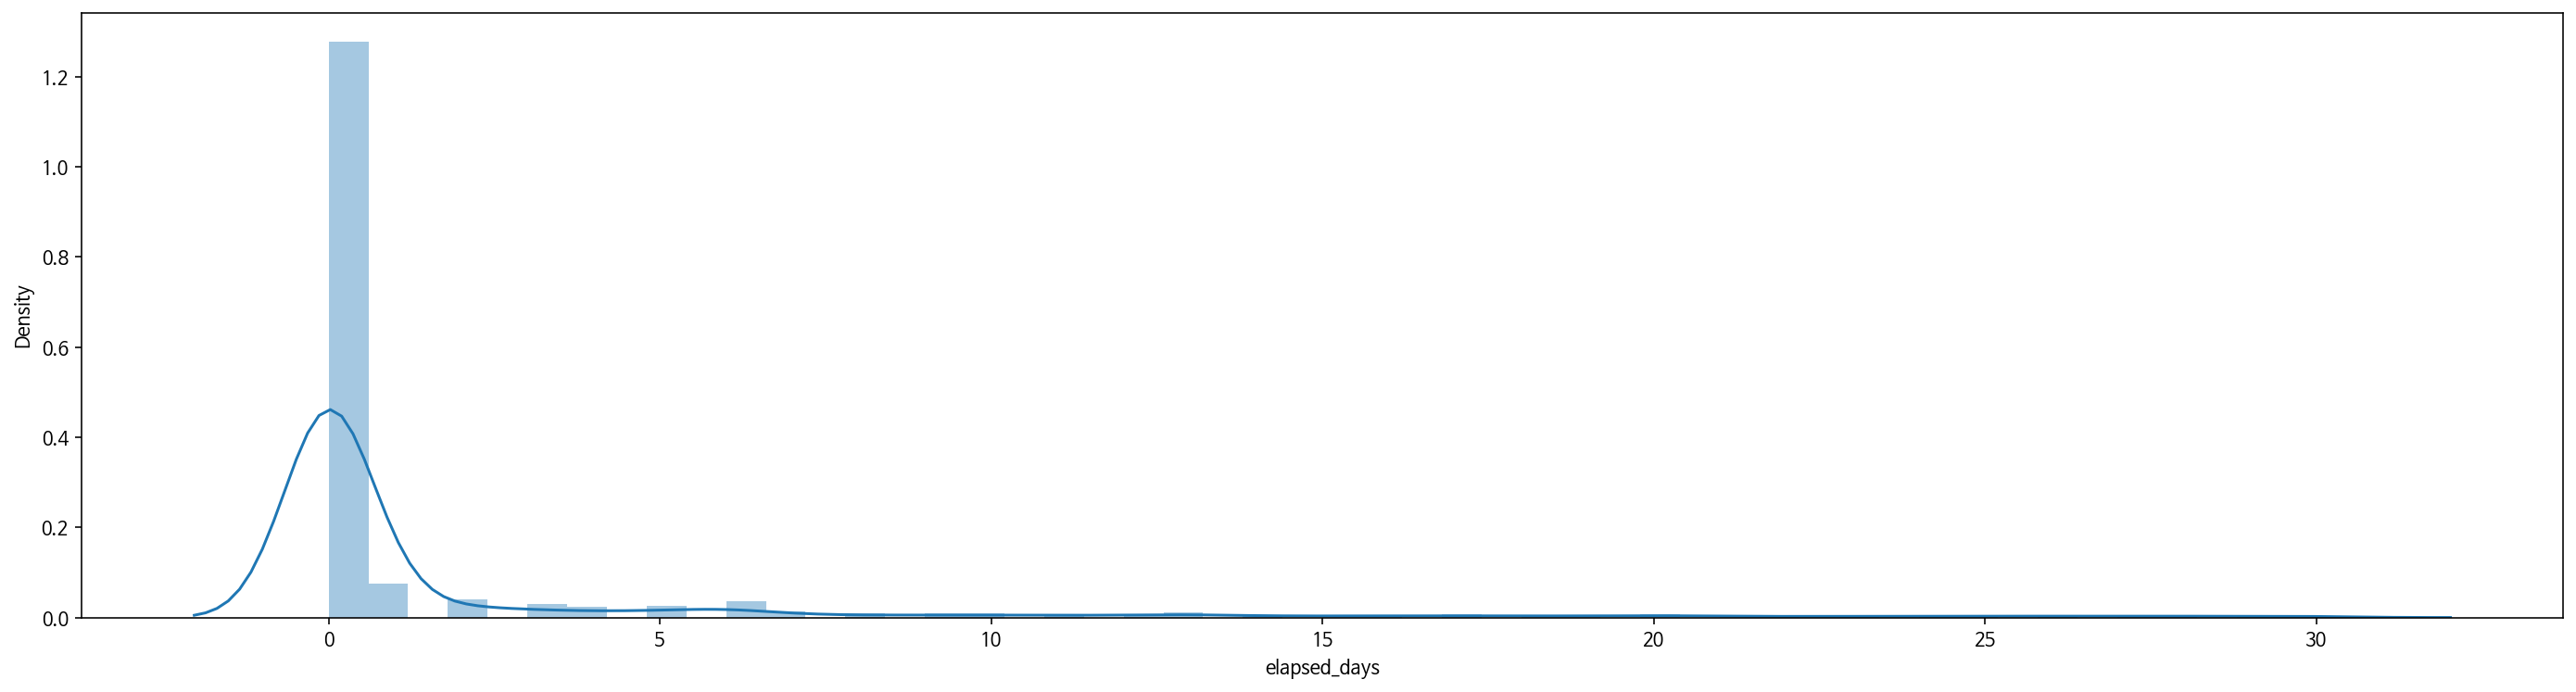

CPU times: user 696 ms, sys: 126 ms, total: 822 ms
Wall time: 699 ms


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_elapsed_a.elapsed_days)

plt.show()

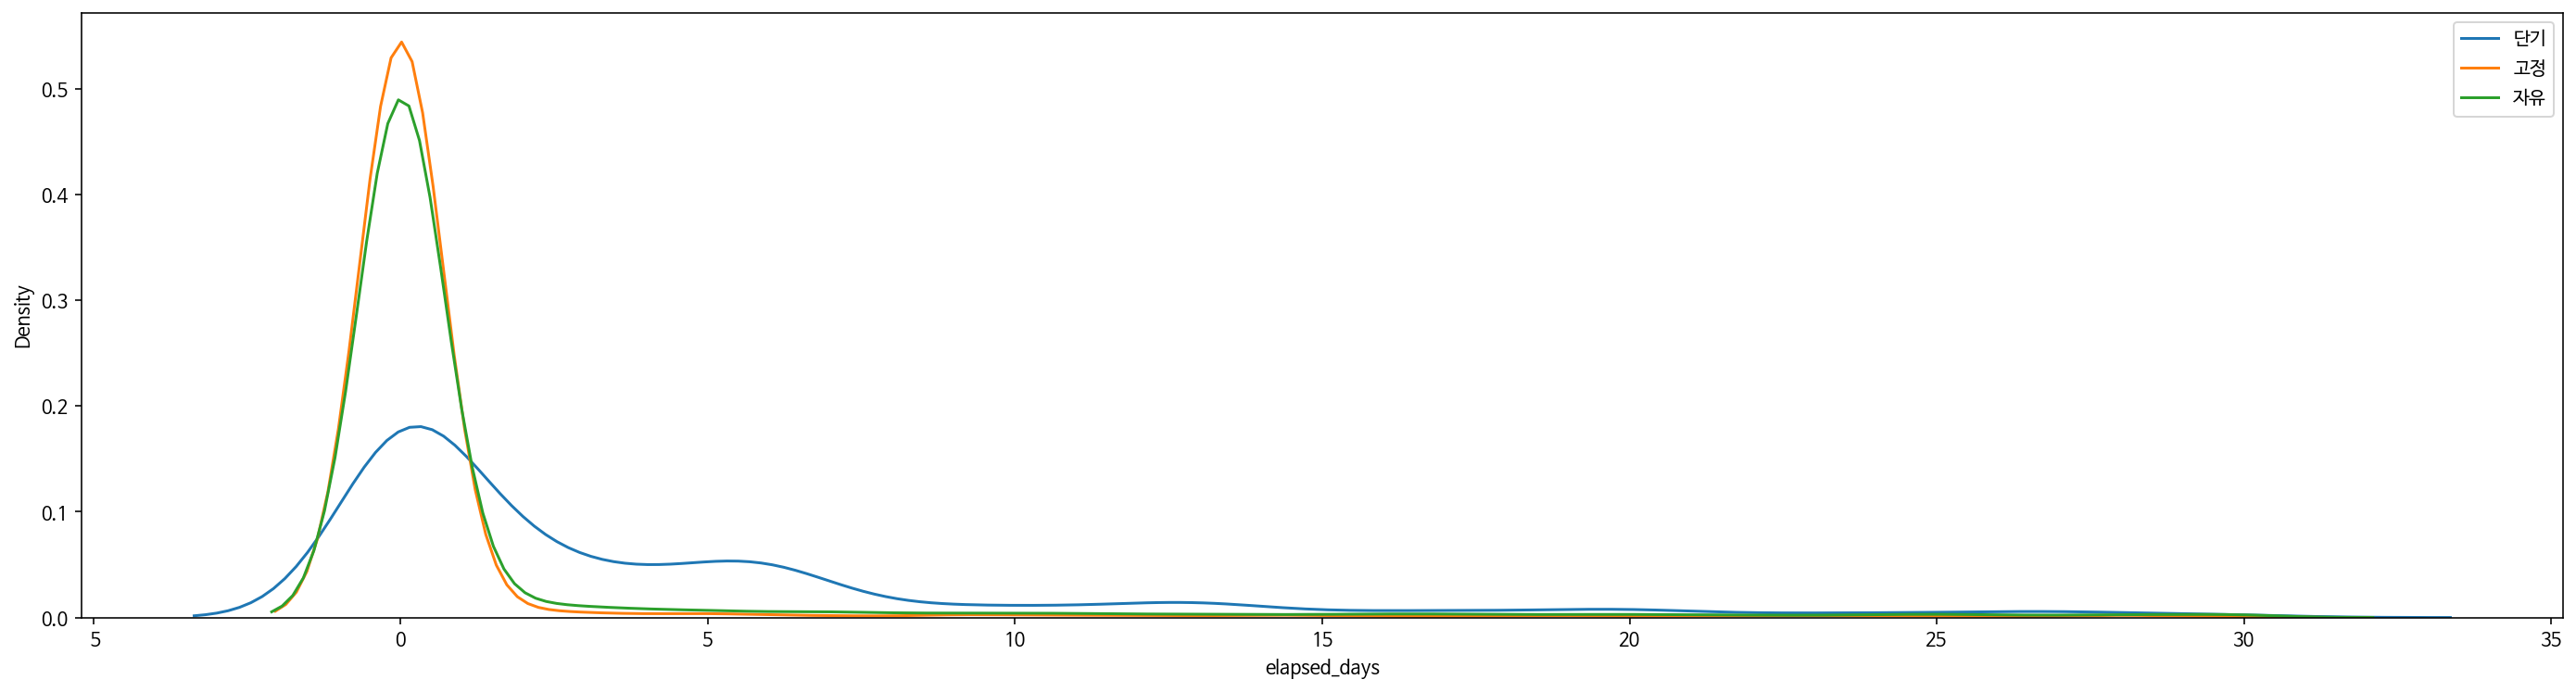

CPU times: user 698 ms, sys: 118 ms, total: 816 ms
Wall time: 697 ms


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_elapsed_a[df_elapsed_a['item_seg'] == '단기'].elapsed_days, label = '단기', hist = False)
sns.distplot(df_elapsed_a[df_elapsed_a['item_seg'] == '고정'].elapsed_days, label = '고정', hist = False)
sns.distplot(df_elapsed_a[df_elapsed_a['item_seg'] == '자유'].elapsed_days, label = '자유', hist = False)
plt.legend()
plt.show()

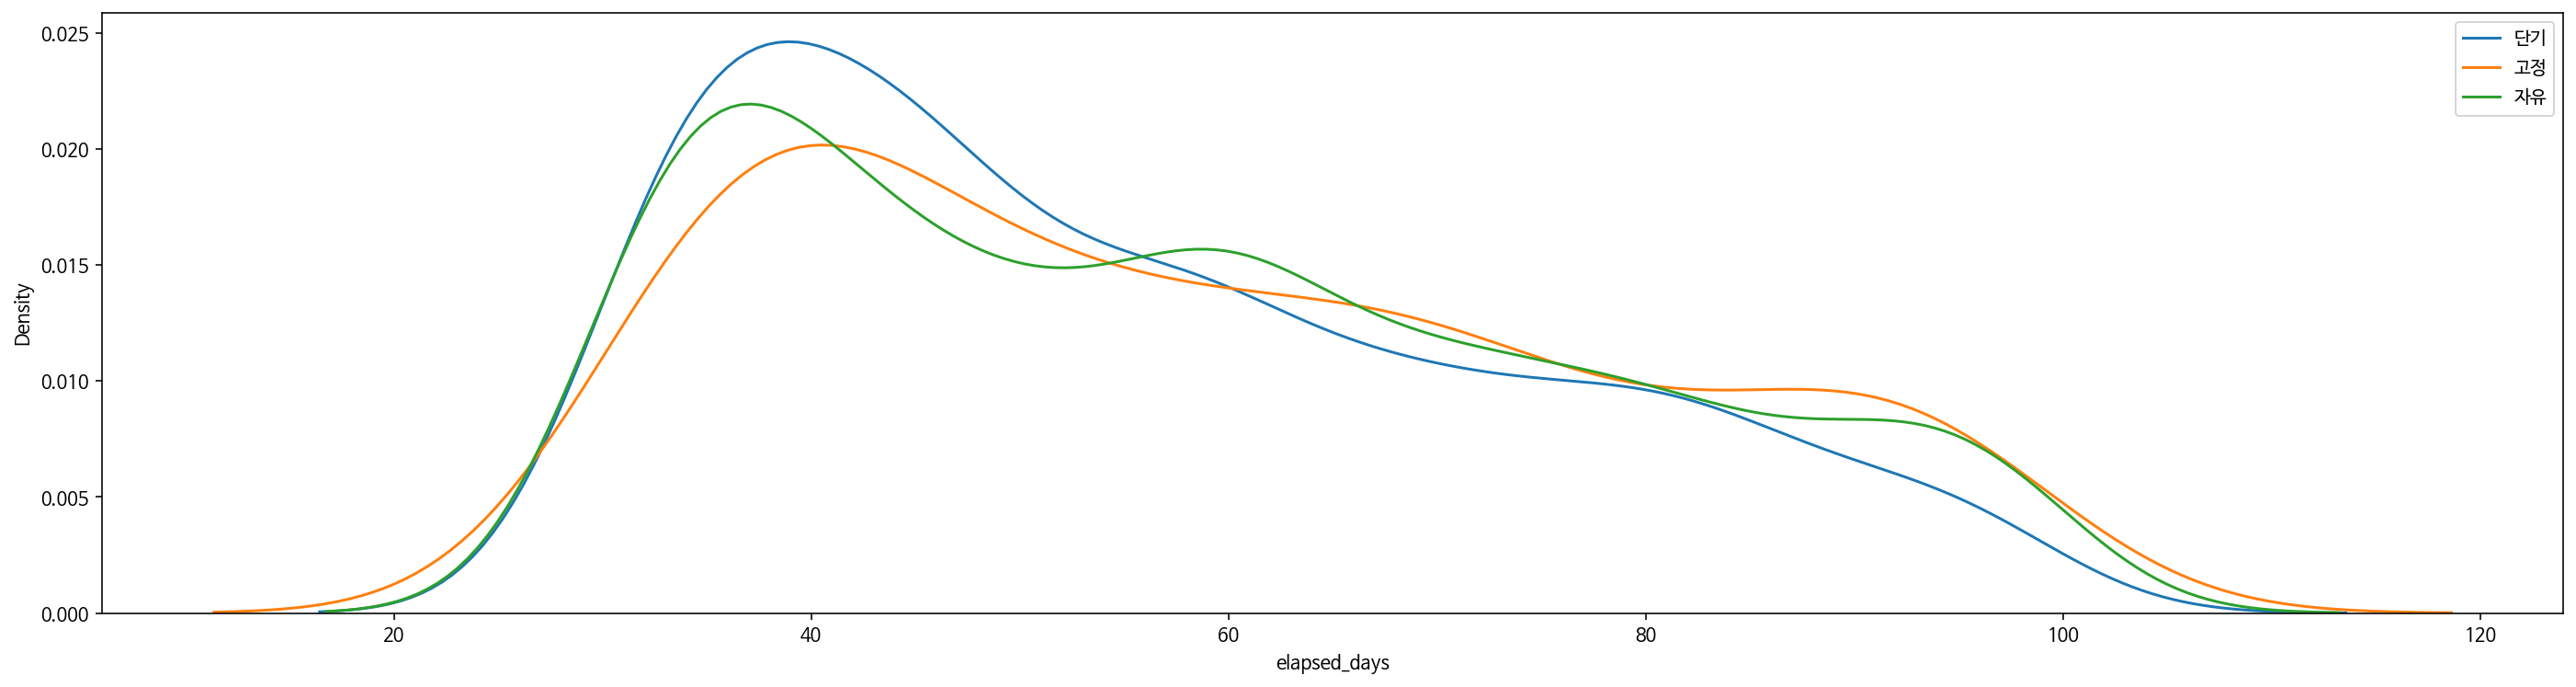

CPU times: user 491 ms, sys: 17.4 ms, total: 508 ms
Wall time: 511 ms


In [ ]:
%%time
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (24, 6))

sns.distplot(df_elapsed_b[df_elapsed_b['item_seg'] == '단기'].elapsed_days, label = '단기', hist = False)
sns.distplot(df_elapsed_b[df_elapsed_b['item_seg'] == '고정'].elapsed_days, label = '고정', hist = False)
sns.distplot(df_elapsed_b[df_elapsed_b['item_seg'] == '자유'].elapsed_days, label = '자유', hist = False)
plt.legend()
plt.show()